# Quantitative Report

Here we generate quantitative report of performance using RMSE, KL divergence, and Wasserstein distance.

In [14]:
import sys
sys.path.append("./source")

import harmonic
from lmmNet import *
import train_onestep
import predict_onestep
import predict_lmmNet
import train_lmmNet
from scipy.integrate import odeint

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

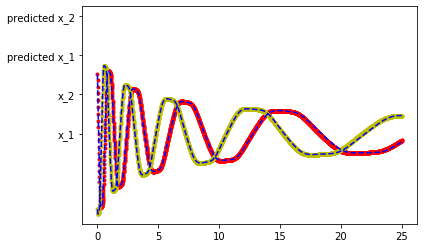

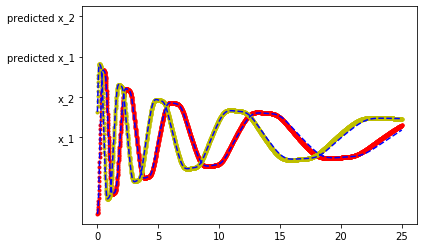

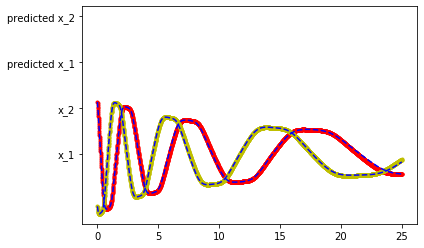

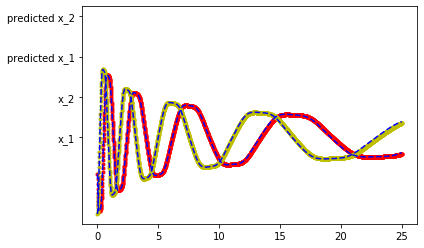

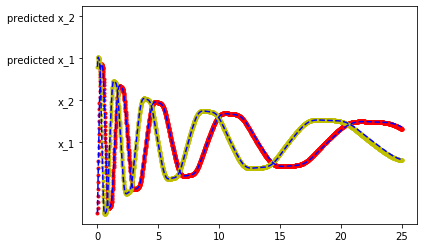

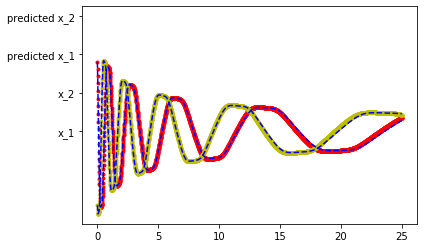

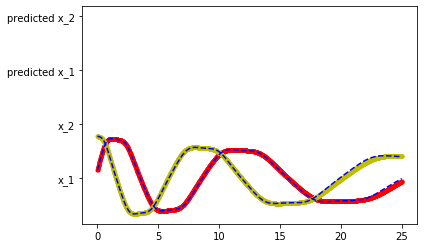

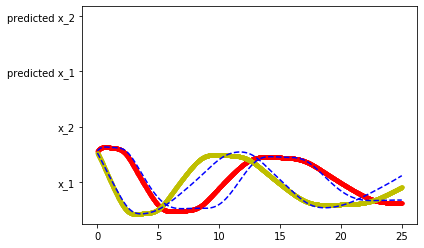

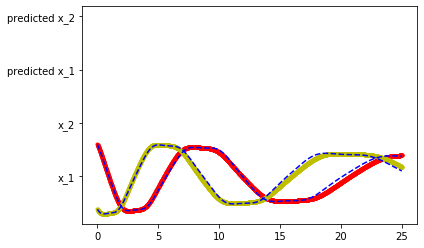

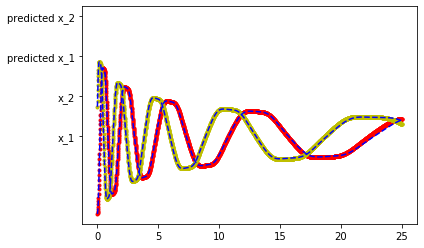

In [15]:
# list to contain the MSEs
MSE_list = []


for _ in range(10):
    # generate data with random initial conditions
    xi = np.random.uniform(-2, 2, 1)[0]
    yi = np.random.uniform(-2, 2, 1)[0]
    time_points, cubic_data = harmonic.simulate_custom(xinit=xi, yinit=yi)
    model = train_lmmNet.train_easy(time_points, cubic_data)
    x0 = np.array([xi, yi]) # initial conditions
    predicted_traj = odeint(lambda x, t: predict_lmmNet.predict_fn(x, t, model), x0, time_points)
    mse1 = predict_lmmNet.compute_MSE(predicted_traj, cubic_data[0], 0)
    mse2 = predict_lmmNet.compute_MSE(predicted_traj, cubic_data[0], 1)
    MSE_list.append((mse1, mse2))
    
    # plot
    plt.plot(time_points, cubic_data[0,:,0], 'r.', 'x_1')
    plt.plot(time_points, cubic_data[0,:,1], 'y.', 'x_2')
    plt.plot(time_points, predicted_traj[:,0], 'b--', 'predicted x_1')
    plt.plot(time_points, predicted_traj[:,1], 'b--', 'predicted x_2')
    plt.show()

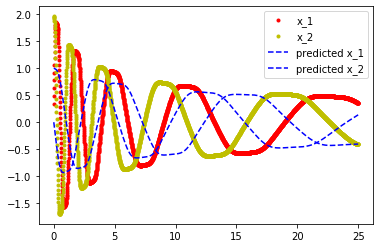

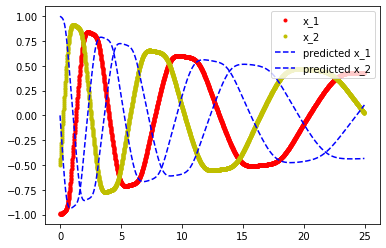

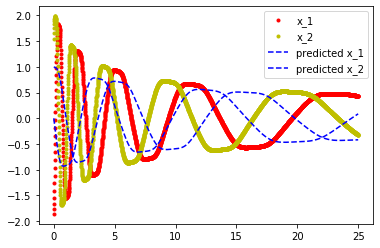

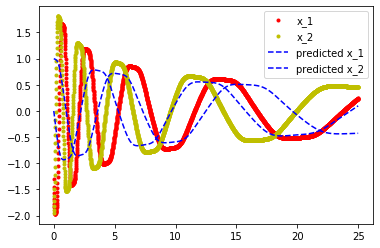

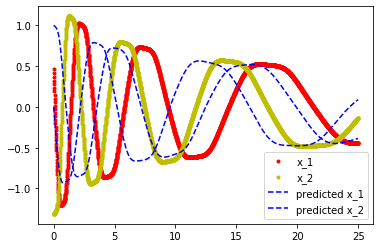

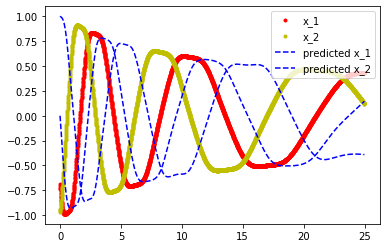

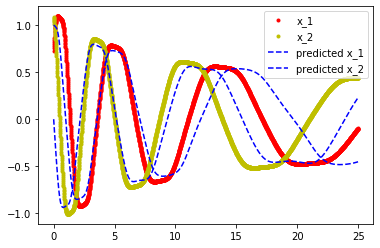

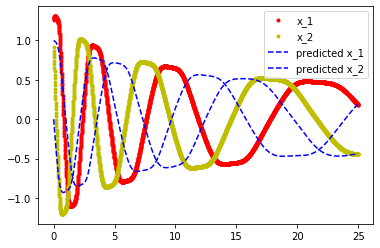

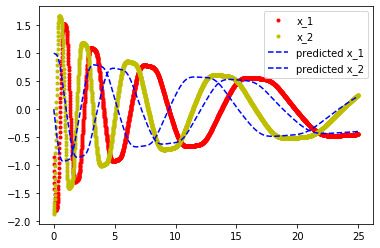

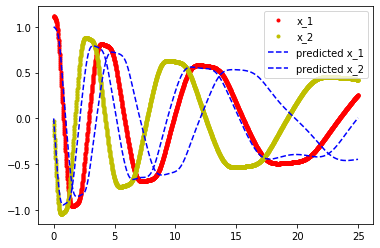

In [18]:
# now we do the same for the test data
mse_lmmnet_list = []
time_points, test_data = harmonic.simulate_custom(xinit=1, yinit=0)

for _ in range(10):
    # generate data with random initial conditions
    xi = np.random.uniform(-2, 2, 1)[0]
    yi = np.random.uniform(-2, 2, 1)[0]
    time_points, cubic_data = harmonic.simulate_custom(xinit=xi, yinit=yi)
    model = train_lmmNet.train_easy(time_points, cubic_data)
    x0 = test_data[0,0,:] # initial conditions
    predicted_traj = odeint(lambda x, t: predict_lmmNet.predict_fn(x, t, model), x0, time_points)
    mse1 = predict_lmmNet.compute_MSE(predicted_traj, test_data[0], 0)
    mse2 = predict_lmmNet.compute_MSE(predicted_traj, test_data[0], 1)
    mse_lmmnet_list.append((mse1, mse2))
    
    # plot
    plt.plot(time_points, cubic_data[0,:,0], 'r.', label='x_1')
    plt.plot(time_points, cubic_data[0,:,1], 'y.', label='x_2')
    plt.plot(time_points, predicted_traj[:,0], 'b--', label='predicted x_1')
    plt.plot(time_points, predicted_traj[:,1], 'b--', label='predicted x_2')
    plt.legend()
    plt.show()

In [20]:
import pickle

with open('mse_lmmnet.pkl', 'wb') as file:
    pickle.dump(mse_lmmnet_list, file)
    
with open('mse_onestep.pkl', 'wb') as file:
    pickle.dump(mse_onestep_list, file)

Now we repeat for the 3D Oscillator using both one-step learning and LmmNet. Also get SINDy results.

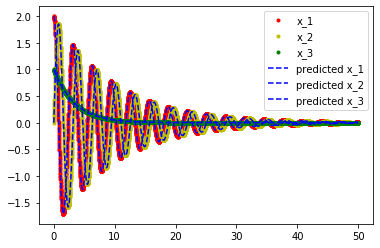

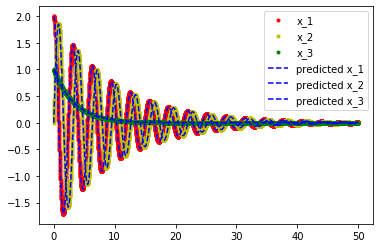

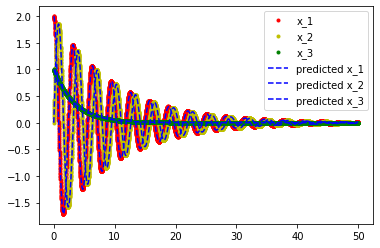

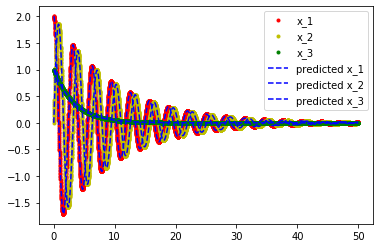

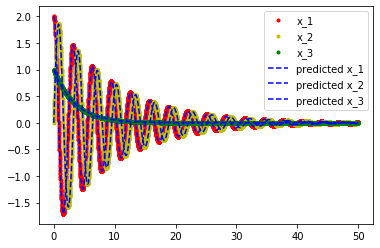

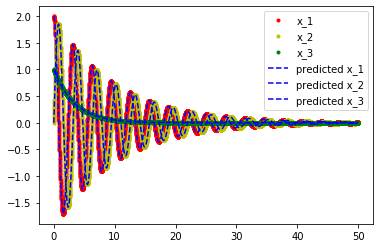

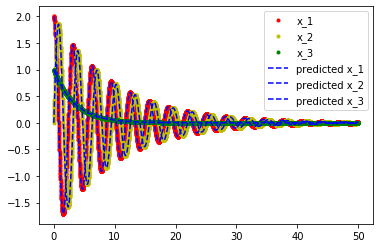

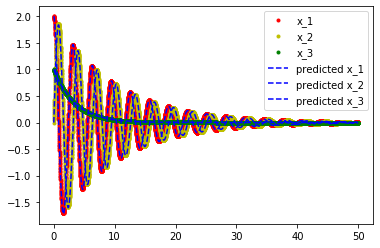

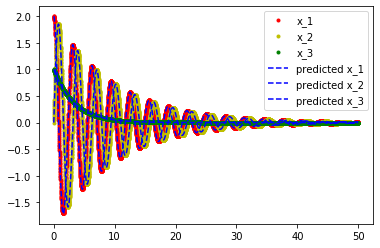

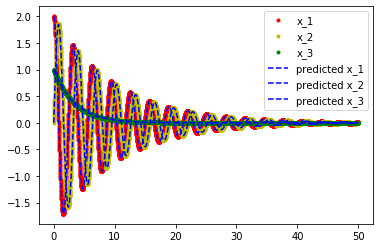

In [40]:
import linear

# now we do the same for 3D linear oscillator

mse_lmmnet_list = []
time_points, test_data = linear.simulate_default()

for _ in range(10):
    # generate data with random initial conditions
    xi = np.random.uniform(-2, 2, 1)[0]
    yi = np.random.uniform(-2, 2, 1)[0]
    zi = np.random.uniform(-2, 2, 1)[0]
    time_points, cubic_data = linear.simulate_custom(xinit=xi, yinit=yi, zinit=zi)
    model = train_lmmNet.train_easy(time_points, cubic_data)
    x0 = test_data[0,0,:] # initial conditions
    predicted_traj = odeint(lambda x, t: predict_lmmNet.predict_fn(x, t, model), x0, time_points)
    mse1 = predict_lmmNet.compute_MSE(predicted_traj, test_data[0], 0)
    mse2 = predict_lmmNet.compute_MSE(predicted_traj, test_data[0], 1)
    mse3 = predict_lmmNet.compute_MSE(predicted_traj, test_data[0], 2)
    mse_lmmnet_list.append((mse1, mse2, mse3))
    
    # plot
    plt.plot(time_points, test_data[0,:,0], 'r.', label='x_1')
    plt.plot(time_points, test_data[0,:,1], 'y.', label='x_2')
    plt.plot(time_points, test_data[0,:,2], 'g.', label='x_3')
    plt.plot(time_points, predicted_traj[:,0], 'b--', label='predicted x_1')
    plt.plot(time_points, predicted_traj[:,1], 'b--', label='predicted x_2')
    plt.plot(time_points, predicted_traj[:,2], 'b--', label='predicted x_3')
    plt.legend()
    plt.show()

Shape of the dataframe is: (5000, 4)
Shape of the dataframe is: (5000, 4)
Target: x_component, CV Pearson R2 coefficient: 0.999869
Target: y_component, CV Pearson R2 coefficient: 0.999872
Target: z_component, CV Pearson R2 coefficient: 0.999992
Average training score: 0.9999110370744152
Real data:


x_component  y_component   z_component
Strain                                        
2          2.000000     0.000000  1.000000e+00
2          1.997601     0.039957  9.970045e-01
2          1.994407     0.079819  9.940180e-01
2          1.990421     0.119569  9.910403e-01
2          1.985645     0.159191  9.880717e-01
...             ...          ...           ...
2          0.010936    -0.007990  3.105255e-07
2          0.011082    -0.007762  3.095953e-07
2          0.011224    -0.007531  3.086679e-07
2          0.011361    -0.007298  3.077432e-07
2          0.011493    -0.007062  3.068214e-07

[5000 rows x 3 columns]

Predicted data:


x_component  y_component  z_component
Time                                        
0.00      2.000000     0.000000     1.000000
0.01      1.998776     0.039833     0.997202
0.02      1.996447     0.079345     0.994403
0.03      1.993755     0.118805     0.991605
0.04      1.989542     0.158265     0.988815
...            ...          ...          ...
49.95     0.027243    -0.013423    -0.001494
49.96     0.027468    -0.012874    -0.001495
49.97     0.027680    -0.012319    -0.001496
49.98     0.027881    -0.011759    -0.001498
49.99     0.028076    -0.011198    -0.001499

[5000 rows x 3 columns]

./source/predict_onestep.py:217: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  rmse = math.sqrt(quad(integrand,min(times),max(times),limit=200)[0])
./source/predict_onestep.py:222: IntegrationWarning: The maximum number of subdivisions (200) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  rmsep = math.sqrt(quad(percent_integrand,min(times),max(times),limit=200)[0])


ML Fit: x_component 0.6232097928415339 RMSE percentage: 112.84963797015743
ML Fit: y_component 0.6220928270282274 RMSE percentage: 118.62897821892349


./source/predict_onestep.py:222: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  rmsep = math.sqrt(quad(percent_integrand,min(times),max(times),limit=200)[0])


ML Fit: z_component 0.020164968535650397 RMSE percentage: 1536.5233386155187
ML model aggregate error
Average RMSE: 0.4218225294684706
Total percentage error: 589.3339849348666


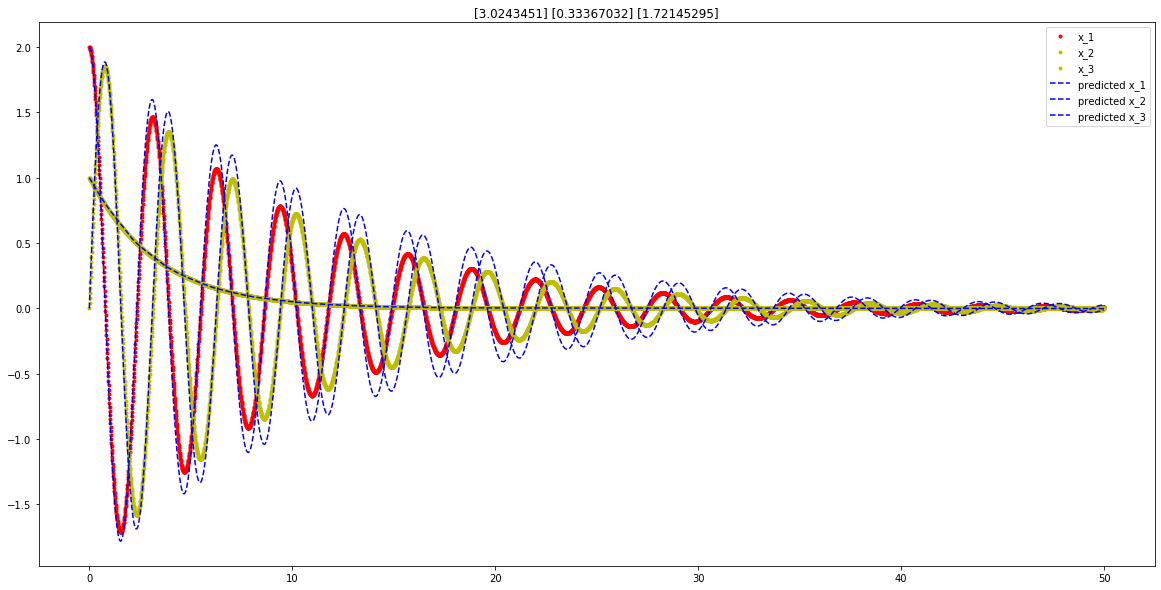

Shape of the dataframe is: (5000, 4)
Target: x_component, CV Pearson R2 coefficient: 0.999873
Target: y_component, CV Pearson R2 coefficient: 0.999877
Target: z_component, CV Pearson R2 coefficient: 0.999989
Average training score: 0.9999130372816151
Real data:


x_component  y_component   z_component
Strain                                        
2          2.000000     0.000000  1.000000e+00
2          1.997601     0.039957  9.970045e-01
2          1.994407     0.079819  9.940180e-01
2          1.990421     0.119569  9.910403e-01
2          1.985645     0.159191  9.880717e-01
...             ...          ...           ...
2          0.010936    -0.007990  3.105255e-07
2          0.011082    -0.007762  3.095953e-07
2          0.011224    -0.007531  3.086679e-07
2          0.011361    -0.007298  3.077432e-07
2          0.011493    -0.007062  3.068214e-07

[5000 rows x 3 columns]

Predicted data:


x_component  y_component  z_component
Time                                        
0.00      2.000000     0.000000     1.000000
0.01      1.998658     0.040207     0.996832
0.02      1.996580     0.080415     0.993664
0.03      1.993591     0.120622     0.990496
0.04      1.989675     0.160402     0.987354
...            ...          ...          ...
49.95    -0.005481     0.012901    -0.000438
49.96    -0.005737     0.012772    -0.000439
49.97    -0.005992     0.012629    -0.000441
49.98    -0.006244     0.012479    -0.000442
49.99    -0.006496     0.012329    -0.000443

[5000 rows x 3 columns]

./source/predict_onestep.py:217: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  rmse = math.sqrt(quad(integrand,min(times),max(times),limit=200)[0])
./source/predict_onestep.py:222: IntegrationWarning: The maximum number of subdivisions (200) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  rmsep = math.sqrt(quad(percent_integrand,min(times),max(times),limit=200)[0])


ML Fit: x_component 0.5685758770749241 RMSE percentage: 115.91947747085322
ML Fit: y_component 0.5688681427146722 RMSE percentage: 152.09970771821435


./source/predict_onestep.py:222: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  rmsep = math.sqrt(quad(percent_integrand,min(times),max(times),limit=200)[0])


ML Fit: z_component 0.04301982873717967 RMSE percentage: 790.9332381093546
ML model aggregate error
Average RMSE: 0.39348794950892535
Total percentage error: 352.98414109947413


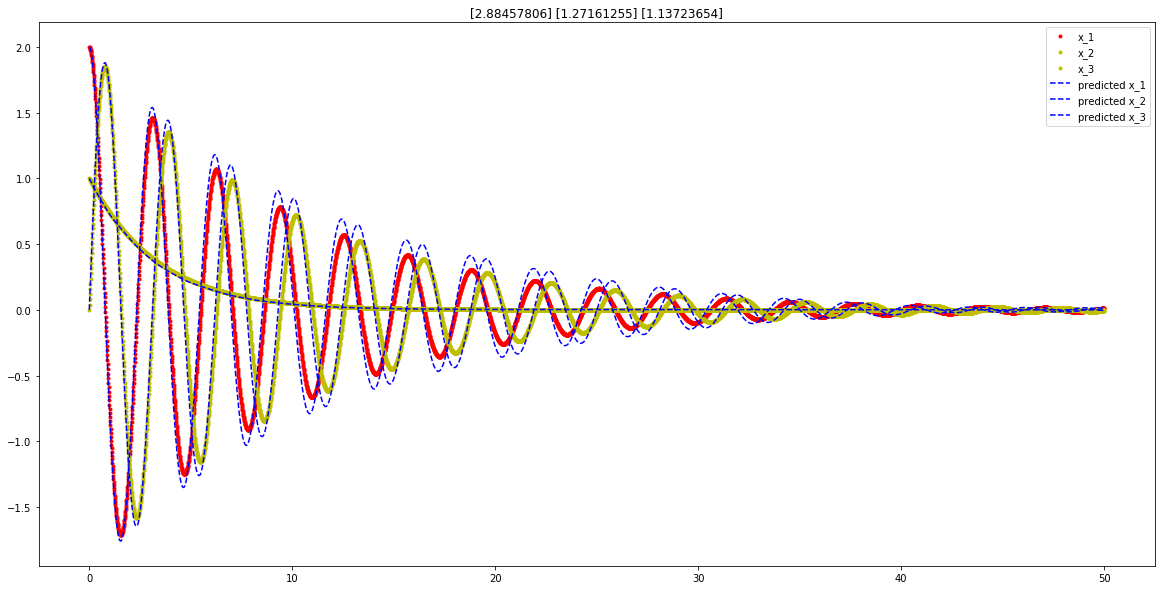

Shape of the dataframe is: (5000, 4)
Target: x_component, CV Pearson R2 coefficient: 0.999864
Target: y_component, CV Pearson R2 coefficient: 0.999860
Target: z_component, CV Pearson R2 coefficient: 0.999989
Average training score: 0.9999043481336249
Real data:


x_component  y_component   z_component
Strain                                        
2          2.000000     0.000000  1.000000e+00
2          1.997601     0.039957  9.970045e-01
2          1.994407     0.079819  9.940180e-01
2          1.990421     0.119569  9.910403e-01
2          1.985645     0.159191  9.880717e-01
...             ...          ...           ...
2          0.010936    -0.007990  3.105255e-07
2          0.011082    -0.007762  3.095953e-07
2          0.011224    -0.007531  3.086679e-07
2          0.011361    -0.007298  3.077432e-07
2          0.011493    -0.007062  3.068214e-07

[5000 rows x 3 columns]

Predicted data:


x_component  y_component  z_component
Time                                        
0.00      2.000000     0.000000     1.000000
0.01      1.999238     0.038442     0.997306
0.02      1.997552     0.076855     0.994610
0.03      1.994461     0.115233     0.991913
0.04      1.990739     0.153606     0.989215
...            ...          ...          ...
49.95     0.019392    -0.007386    -0.000365
49.96     0.019518    -0.006981    -0.000366
49.97     0.019631    -0.006573    -0.000367
49.98     0.019735    -0.006166    -0.000368
49.99     0.019832    -0.005758    -0.000368

[5000 rows x 3 columns]

./source/predict_onestep.py:217: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  rmse = math.sqrt(quad(integrand,min(times),max(times),limit=200)[0])
./source/predict_onestep.py:222: IntegrationWarning: The maximum number of subdivisions (200) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  rmsep = math.sqrt(quad(percent_integrand,min(times),max(times),limit=200)[0])


ML Fit: x_component 0.7745014336778361 RMSE percentage: 117.7952714244414
ML Fit: y_component 0.7731039530163483 RMSE percentage: 119.78826724446259


./source/predict_onestep.py:222: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  rmsep = math.sqrt(quad(percent_integrand,min(times),max(times),limit=200)[0])


ML Fit: z_component 0.0504037420834043 RMSE percentage: 730.3880419712858
ML model aggregate error
Average RMSE: 0.5326697095925296
Total percentage error: 322.65719354672996


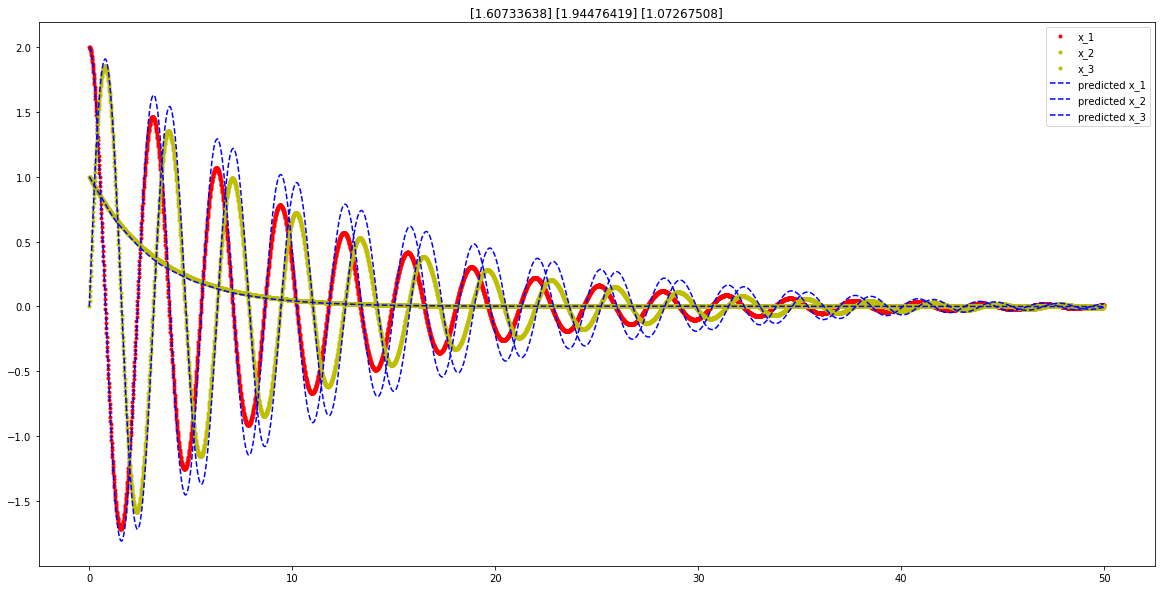

Shape of the dataframe is: (5000, 4)
Target: x_component, CV Pearson R2 coefficient: 0.999876
Target: y_component, CV Pearson R2 coefficient: 0.999865
Target: z_component, CV Pearson R2 coefficient: 0.999987
Average training score: 0.9999094150292768
Real data:


x_component  y_component   z_component
Strain                                        
2          2.000000     0.000000  1.000000e+00
2          1.997601     0.039957  9.970045e-01
2          1.994407     0.079819  9.940180e-01
2          1.990421     0.119569  9.910403e-01
2          1.985645     0.159191  9.880717e-01
...             ...          ...           ...
2          0.010936    -0.007990  3.105255e-07
2          0.011082    -0.007762  3.095953e-07
2          0.011224    -0.007531  3.086679e-07
2          0.011361    -0.007298  3.077432e-07
2          0.011493    -0.007062  3.068214e-07

[5000 rows x 3 columns]

Predicted data:


x_component  y_component  z_component
Time                                        
0.00      2.000000     0.000000     1.000000
0.01      1.997526     0.040361     0.997339
0.02      1.995221     0.080616     0.994699
0.03      1.992006     0.120872     0.992058
0.04      1.987248     0.161128     0.989418
...            ...          ...          ...
49.95    -0.013586    -0.010607    -0.000864
49.96    -0.013320    -0.010913    -0.000864
49.97    -0.013055    -0.011218    -0.000865
49.98    -0.012789    -0.011506    -0.000866
49.99    -0.012524    -0.011782    -0.000867

[5000 rows x 3 columns]

./source/predict_onestep.py:217: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  rmse = math.sqrt(quad(integrand,min(times),max(times),limit=200)[0])
./source/predict_onestep.py:222: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  rmsep = math.sqrt(quad(percent_integrand,min(times),max(times),limit=200)[0])


ML Fit: x_component 0.7557220359565547 RMSE percentage: 152.79180893745524


./source/predict_onestep.py:222: IntegrationWarning: The maximum number of subdivisions (200) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  rmsep = math.sqrt(quad(percent_integrand,min(times),max(times),limit=200)[0])


ML Fit: y_component 0.7577879093395282 RMSE percentage: 170.17888012574159


./source/predict_onestep.py:222: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  rmsep = math.sqrt(quad(percent_integrand,min(times),max(times),limit=200)[0])


ML Fit: z_component 0.03280313909933527 RMSE percentage: 1139.265193546549
ML model aggregate error
Average RMSE: 0.5154376947984728
Total percentage error: 487.4119608699153


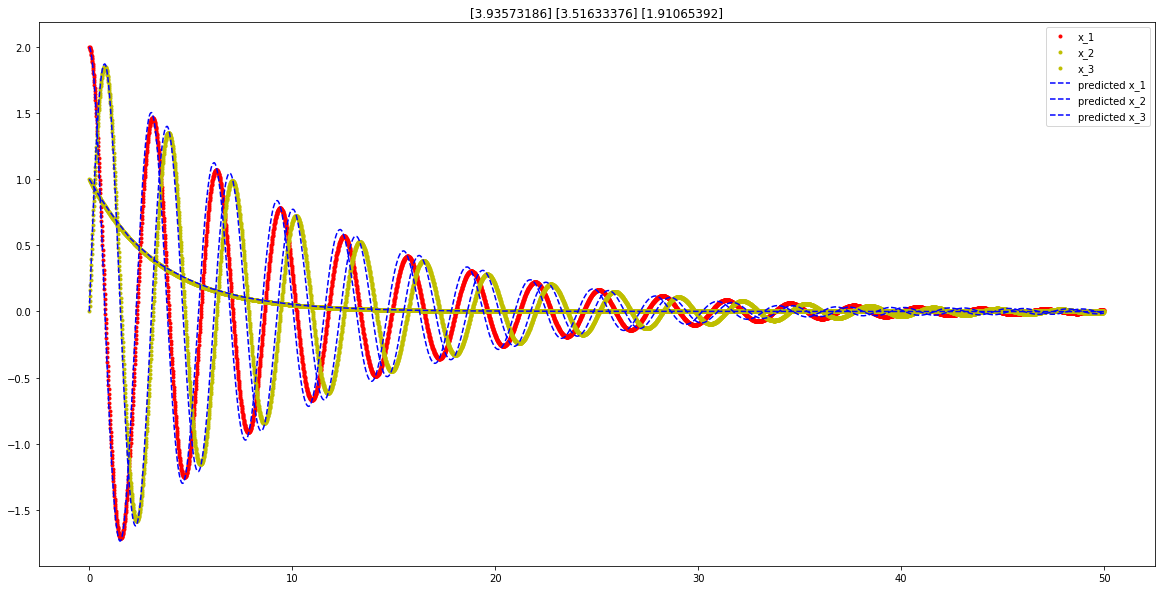

Shape of the dataframe is: (5000, 4)
Target: x_component, CV Pearson R2 coefficient: 0.999865
Target: y_component, CV Pearson R2 coefficient: 0.999867
Target: z_component, CV Pearson R2 coefficient: 0.999992
Average training score: 0.9999080150000061
Real data:


x_component  y_component   z_component
Strain                                        
2          2.000000     0.000000  1.000000e+00
2          1.997601     0.039957  9.970045e-01
2          1.994407     0.079819  9.940180e-01
2          1.990421     0.119569  9.910403e-01
2          1.985645     0.159191  9.880717e-01
...             ...          ...           ...
2          0.010936    -0.007990  3.105255e-07
2          0.011082    -0.007762  3.095953e-07
2          0.011224    -0.007531  3.086679e-07
2          0.011361    -0.007298  3.077432e-07
2          0.011493    -0.007062  3.068214e-07

[5000 rows x 3 columns]

Predicted data:


x_component  y_component  z_component
Time                                        
0.00      2.000000     0.000000     1.000000
0.01      1.998693     0.040401     0.997343
0.02      1.997459     0.080802     0.994703
0.03      1.994308     0.121202     0.992075
0.04      1.990225     0.161626     0.989448
...            ...          ...          ...
49.95    -0.009519     0.014004    -0.000956
49.96    -0.009808     0.013774    -0.000958
49.97    -0.010093     0.013538    -0.000959
49.98    -0.010375     0.013300    -0.000961
49.99    -0.010655     0.013059    -0.000962

[5000 rows x 3 columns]

./source/predict_onestep.py:217: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  rmse = math.sqrt(quad(integrand,min(times),max(times),limit=200)[0])
./source/predict_onestep.py:222: IntegrationWarning: The maximum number of subdivisions (200) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  rmsep = math.sqrt(quad(percent_integrand,min(times),max(times),limit=200)[0])


ML Fit: x_component 0.7783725266253505 RMSE percentage: 161.32133117147265
ML Fit: y_component 0.7792170822662956 RMSE percentage: 171.24124688089307


./source/predict_onestep.py:222: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  rmsep = math.sqrt(quad(percent_integrand,min(times),max(times),limit=200)[0])


ML Fit: z_component 0.04594610436317475 RMSE percentage: 1152.5992554451987
ML model aggregate error
Average RMSE: 0.5345119044182737
Total percentage error: 495.05394449918816


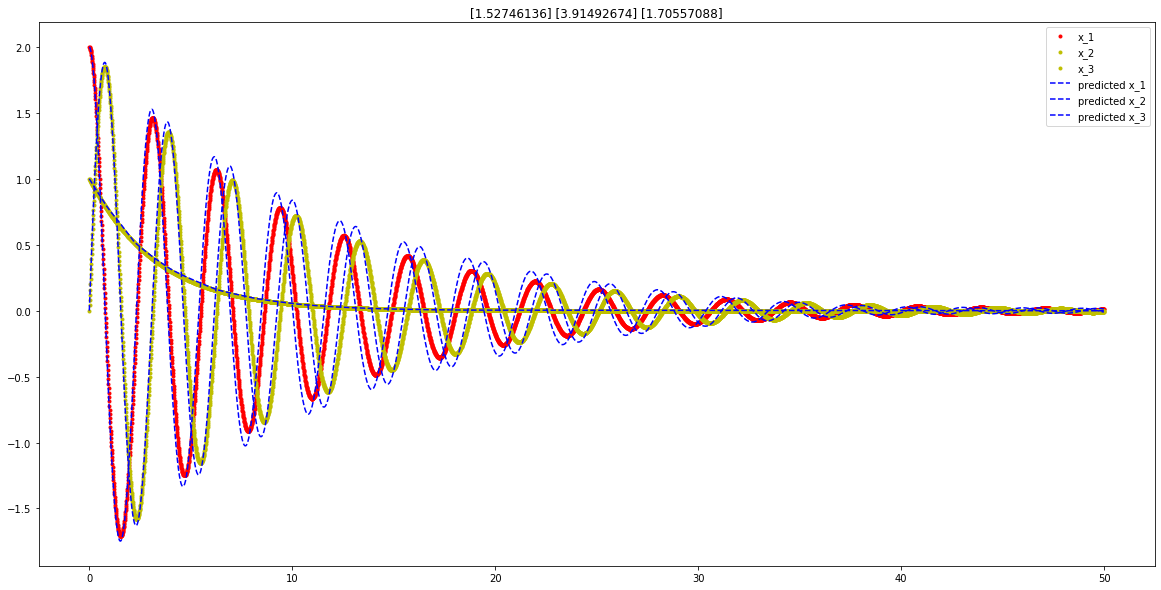

Shape of the dataframe is: (5000, 4)
Target: x_component, CV Pearson R2 coefficient: 0.999878
Target: y_component, CV Pearson R2 coefficient: 0.999866
Target: z_component, CV Pearson R2 coefficient: 0.999991
Average training score: 0.9999115514299673
Real data:


x_component  y_component   z_component
Strain                                        
2          2.000000     0.000000  1.000000e+00
2          1.997601     0.039957  9.970045e-01
2          1.994407     0.079819  9.940180e-01
2          1.990421     0.119569  9.910403e-01
2          1.985645     0.159191  9.880717e-01
...             ...          ...           ...
2          0.010936    -0.007990  3.105255e-07
2          0.011082    -0.007762  3.095953e-07
2          0.011224    -0.007531  3.086679e-07
2          0.011361    -0.007298  3.077432e-07
2          0.011493    -0.007062  3.068214e-07

[5000 rows x 3 columns]

Predicted data:


x_component  y_component  z_component
Time                                        
0.00      2.000000     0.000000     1.000000
0.01      1.998751     0.039800     0.996919
0.02      1.996408     0.079585     0.993837
0.03      1.993455     0.119306     0.990755
0.04      1.989654     0.159003     0.987672
...            ...          ...          ...
49.95    -0.003021     0.007051    -0.000470
49.96    -0.003168     0.006975    -0.000471
49.97    -0.003314     0.006894    -0.000472
49.98    -0.003460     0.006811    -0.000473
49.99    -0.003605     0.006734    -0.000474

[5000 rows x 3 columns]

./source/predict_onestep.py:217: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  rmse = math.sqrt(quad(integrand,min(times),max(times),limit=200)[0])
./source/predict_onestep.py:222: IntegrationWarning: The maximum number of subdivisions (200) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  rmsep = math.sqrt(quad(percent_integrand,min(times),max(times),limit=200)[0])


ML Fit: x_component 0.55618369063448 RMSE percentage: 144.73517024977127
ML Fit: y_component 0.5572860488304312 RMSE percentage: 95.70508595782562


./source/predict_onestep.py:222: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  rmsep = math.sqrt(quad(percent_integrand,min(times),max(times),limit=200)[0])


ML Fit: z_component 0.02207821708419854 RMSE percentage: 825.6038999179832
ML model aggregate error
Average RMSE: 0.37851598551636995
Total percentage error: 355.34805204186006


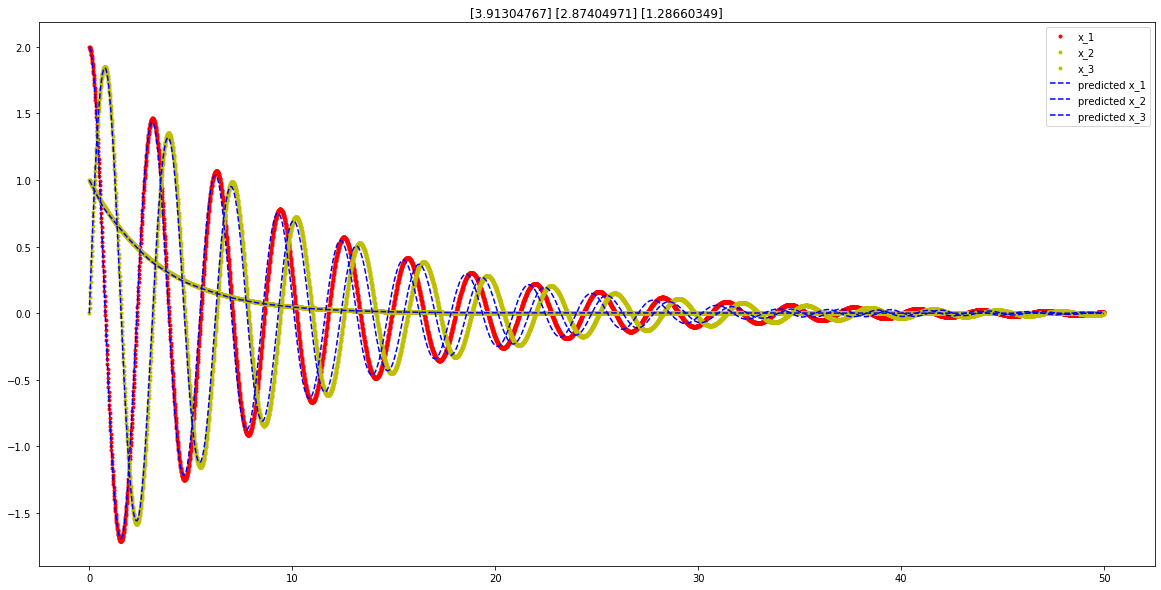

Shape of the dataframe is: (5000, 4)
Target: x_component, CV Pearson R2 coefficient: 0.999882
Target: y_component, CV Pearson R2 coefficient: 0.999853
Target: z_component, CV Pearson R2 coefficient: 0.999992
Average training score: 0.9999089824011279
Real data:


x_component  y_component   z_component
Strain                                        
2          2.000000     0.000000  1.000000e+00
2          1.997601     0.039957  9.970045e-01
2          1.994407     0.079819  9.940180e-01
2          1.990421     0.119569  9.910403e-01
2          1.985645     0.159191  9.880717e-01
...             ...          ...           ...
2          0.010936    -0.007990  3.105255e-07
2          0.011082    -0.007762  3.095953e-07
2          0.011224    -0.007531  3.086679e-07
2          0.011361    -0.007298  3.077432e-07
2          0.011493    -0.007062  3.068214e-07

[5000 rows x 3 columns]

Predicted data:


x_component  y_component  z_component
Time                                        
0.00      2.000000     0.000000     1.000000
0.01      1.997948     0.041686     0.997313
0.02      1.996124     0.083373     0.994636
0.03      1.992740     0.125059     0.991958
0.04      1.988052     0.166745     0.989280
...            ...          ...          ...
49.95     0.009704    -0.001026    -0.001265
49.96     0.009692    -0.000800    -0.001266
49.97     0.009681    -0.000574    -0.001268
49.98     0.009662    -0.000348    -0.001269
49.99     0.009641    -0.000122    -0.001271

[5000 rows x 3 columns]

./source/predict_onestep.py:217: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  rmse = math.sqrt(quad(integrand,min(times),max(times),limit=200)[0])
./source/predict_onestep.py:222: IntegrationWarning: The maximum number of subdivisions (200) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  rmsep = math.sqrt(quad(percent_integrand,min(times),max(times),limit=200)[0])


ML Fit: x_component 1.1031751212671577 RMSE percentage: 144.5655067339378
ML Fit: y_component 1.1010621809189463 RMSE percentage: 247.07206505776256


./source/predict_onestep.py:222: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  rmsep = math.sqrt(quad(percent_integrand,min(times),max(times),limit=200)[0])


ML Fit: z_component 0.036883106486462855 RMSE percentage: 1365.2936427030734
ML model aggregate error
Average RMSE: 0.7470401362241889
Total percentage error: 585.6437381649246


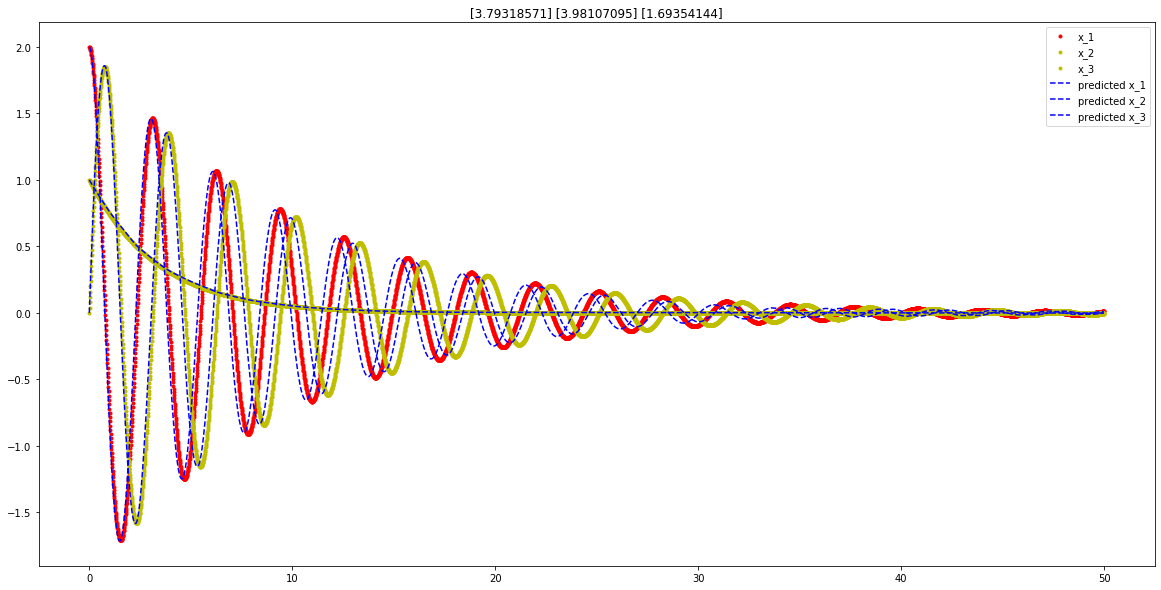

Shape of the dataframe is: (5000, 4)
Target: x_component, CV Pearson R2 coefficient: 0.999877
Target: y_component, CV Pearson R2 coefficient: 0.999864
Target: z_component, CV Pearson R2 coefficient: 0.999993
Average training score: 0.9999113999105943
Real data:


x_component  y_component   z_component
Strain                                        
2          2.000000     0.000000  1.000000e+00
2          1.997601     0.039957  9.970045e-01
2          1.994407     0.079819  9.940180e-01
2          1.990421     0.119569  9.910403e-01
2          1.985645     0.159191  9.880717e-01
...             ...          ...           ...
2          0.010936    -0.007990  3.105255e-07
2          0.011082    -0.007762  3.095953e-07
2          0.011224    -0.007531  3.086679e-07
2          0.011361    -0.007298  3.077432e-07
2          0.011493    -0.007062  3.068214e-07

[5000 rows x 3 columns]

Predicted data:


x_component  y_component  z_component
Time                                        
0.00      2.000000     0.000000     1.000000
0.01      1.998451     0.041754     0.997214
0.02      1.995324     0.083461     0.994434
0.03      1.991859     0.125167     0.991661
0.04      1.987784     0.166874     0.988889
...            ...          ...          ...
49.95    -0.003512     0.018248    -0.001171
49.96    -0.003889     0.018142    -0.001173
49.97    -0.004257     0.018032    -0.001174
49.98    -0.004617     0.017909    -0.001175
49.99    -0.004971     0.017786    -0.001177

[5000 rows x 3 columns]

./source/predict_onestep.py:217: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  rmse = math.sqrt(quad(integrand,min(times),max(times),limit=200)[0])
./source/predict_onestep.py:222: IntegrationWarning: The maximum number of subdivisions (200) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  rmsep = math.sqrt(quad(percent_integrand,min(times),max(times),limit=200)[0])


ML Fit: x_component 0.8622224584873397 RMSE percentage: 172.3182110443374
ML Fit: y_component 0.8637236173752461 RMSE percentage: 173.9368488954561


./source/predict_onestep.py:222: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  rmsep = math.sqrt(quad(percent_integrand,min(times),max(times),limit=200)[0])


ML Fit: z_component 0.036591572617451176 RMSE percentage: 1303.3600490550284
ML model aggregate error
Average RMSE: 0.5875125494933456
Total percentage error: 549.871702998274


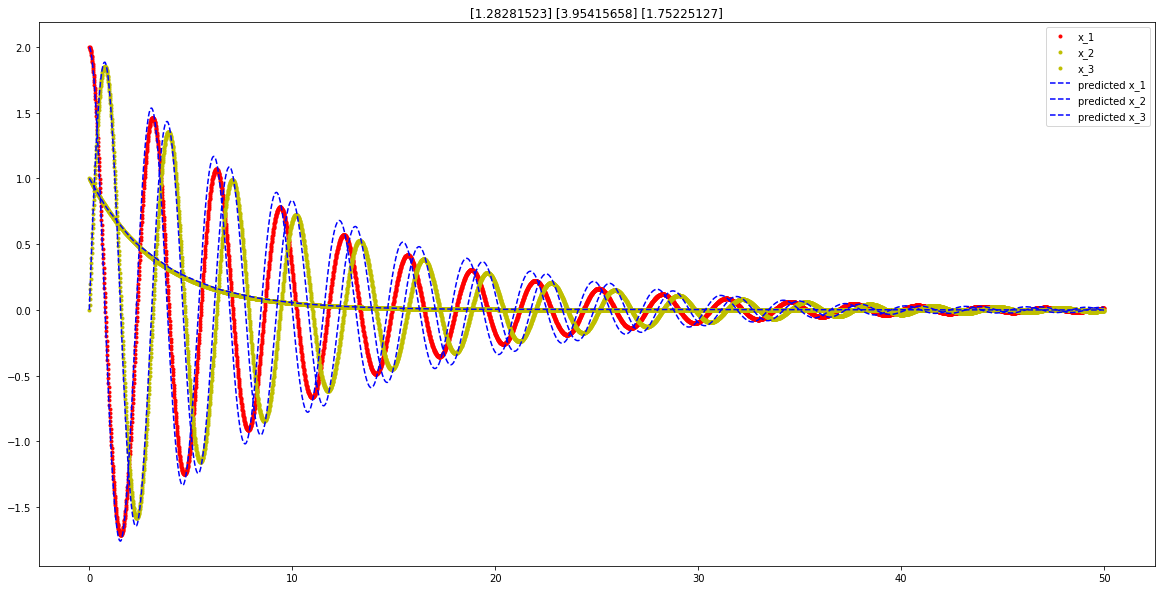

Shape of the dataframe is: (5000, 4)
Target: x_component, CV Pearson R2 coefficient: 0.999867
Target: y_component, CV Pearson R2 coefficient: 0.999848
Target: z_component, CV Pearson R2 coefficient: 0.999992
Average training score: 0.9999024341631905
Real data:


x_component  y_component   z_component
Strain                                        
2          2.000000     0.000000  1.000000e+00
2          1.997601     0.039957  9.970045e-01
2          1.994407     0.079819  9.940180e-01
2          1.990421     0.119569  9.910403e-01
2          1.985645     0.159191  9.880717e-01
...             ...          ...           ...
2          0.010936    -0.007990  3.105255e-07
2          0.011082    -0.007762  3.095953e-07
2          0.011224    -0.007531  3.086679e-07
2          0.011361    -0.007298  3.077432e-07
2          0.011493    -0.007062  3.068214e-07

[5000 rows x 3 columns]

Predicted data:


x_component  y_component  z_component
Time                                        
0.00      2.000000     0.000000     1.000000
0.01      1.998969     0.036440     0.997263
0.02      1.996875     0.072786     0.994536
0.03      1.994086     0.109108     0.991822
0.04      1.990789     0.145394     0.989110
...            ...          ...          ...
49.95     0.013731    -0.044406    -0.001204
49.96     0.014586    -0.044093    -0.001205
49.97     0.015428    -0.043766    -0.001206
49.98     0.016269    -0.043418    -0.001207
49.99     0.017107    -0.043057    -0.001208

[5000 rows x 3 columns]

./source/predict_onestep.py:217: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  rmse = math.sqrt(quad(integrand,min(times),max(times),limit=200)[0])
./source/predict_onestep.py:222: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  rmsep = math.sqrt(quad(percent_integrand,min(times),max(times),limit=200)[0])


ML Fit: x_component 1.1465195320654935 RMSE percentage: 153.2852817086111


./source/predict_onestep.py:222: IntegrationWarning: The maximum number of subdivisions (200) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  rmsep = math.sqrt(quad(percent_integrand,min(times),max(times),limit=200)[0])


ML Fit: y_component 1.1478030665821655 RMSE percentage: 219.21710927108222


./source/predict_onestep.py:222: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  rmsep = math.sqrt(quad(percent_integrand,min(times),max(times),limit=200)[0])


ML Fit: z_component 0.05069051758622392 RMSE percentage: 1375.509185557369
ML model aggregate error
Average RMSE: 0.7816710387446276
Total percentage error: 582.670525512354


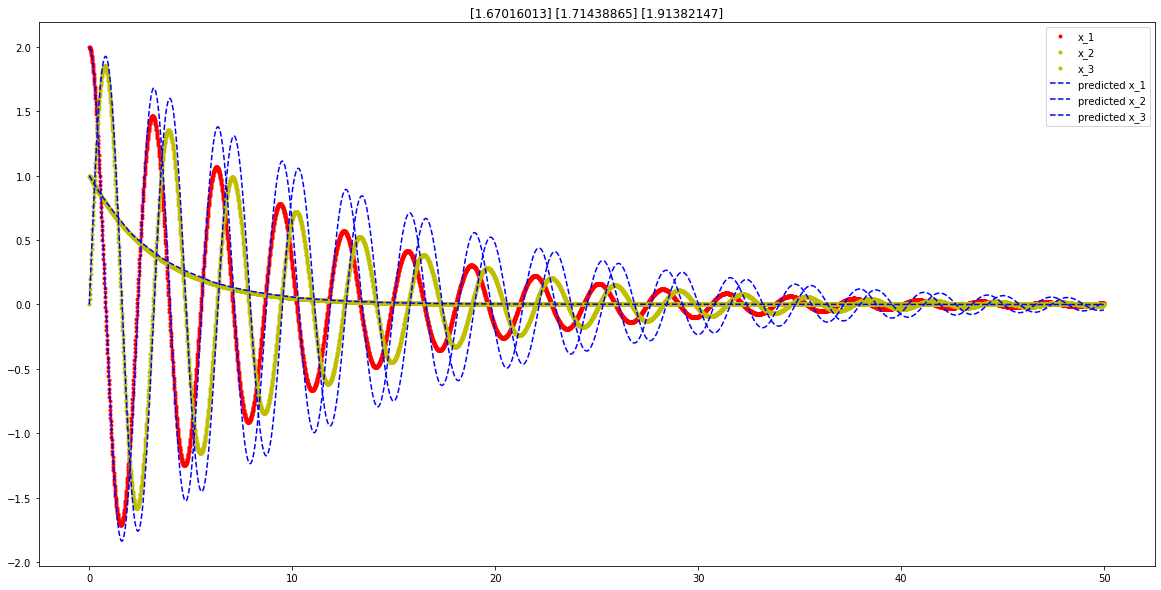

Shape of the dataframe is: (5000, 4)
Target: x_component, CV Pearson R2 coefficient: 0.999872
Target: y_component, CV Pearson R2 coefficient: 0.999872
Target: z_component, CV Pearson R2 coefficient: 0.999993
Average training score: 0.9999125480206423
Real data:


x_component  y_component   z_component
Strain                                        
2          2.000000     0.000000  1.000000e+00
2          1.997601     0.039957  9.970045e-01
2          1.994407     0.079819  9.940180e-01
2          1.990421     0.119569  9.910403e-01
2          1.985645     0.159191  9.880717e-01
...             ...          ...           ...
2          0.010936    -0.007990  3.105255e-07
2          0.011082    -0.007762  3.095953e-07
2          0.011224    -0.007531  3.086679e-07
2          0.011361    -0.007298  3.077432e-07
2          0.011493    -0.007062  3.068214e-07

[5000 rows x 3 columns]

Predicted data:


x_component  y_component  z_component
Time                                        
0.00      2.000000     0.000000     1.000000
0.01      1.998937     0.039957     0.997317
0.02      1.996784     0.079885     0.994636
0.03      1.993786     0.119787     0.991958
0.04      1.989693     0.159617     0.989288
...            ...          ...          ...
49.95     0.024173    -0.026541    -0.001287
49.96     0.024674    -0.026027    -0.001288
49.97     0.025164    -0.025499    -0.001289
49.98     0.025638    -0.024970    -0.001290
49.99     0.026097    -0.024438    -0.001292

[5000 rows x 3 columns]

./source/predict_onestep.py:217: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  rmse = math.sqrt(quad(integrand,min(times),max(times),limit=200)[0])
./source/predict_onestep.py:222: IntegrationWarning: The maximum number of subdivisions (200) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  rmsep = math.sqrt(quad(percent_integrand,min(times),max(times),limit=200)[0])


ML Fit: x_component 0.7961110228738129 RMSE percentage: 133.14858815874464
ML Fit: y_component 0.7986989618725214 RMSE percentage: 139.78063961778903
ML Fit: z_component 0.04227318716240843 RMSE percentage: 1423.374729619244
ML model aggregate error
Average RMSE: 0.5456943906362476
Total percentage error: 565.4346524652592


./source/predict_onestep.py:222: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  rmsep = math.sqrt(quad(percent_integrand,min(times),max(times),limit=200)[0])


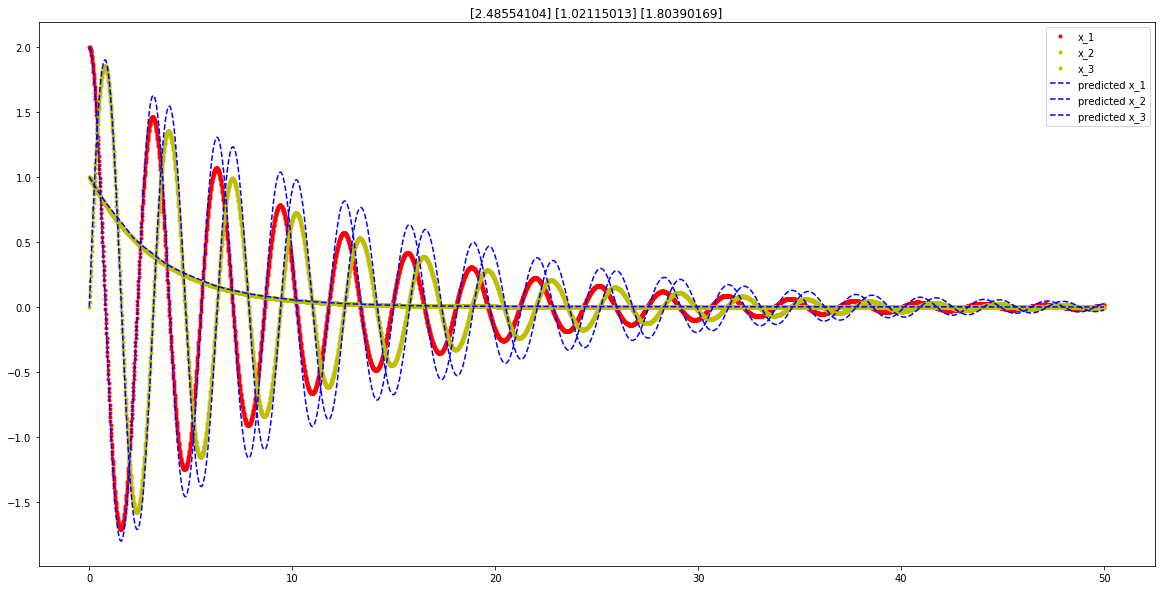

In [66]:
from utils import *
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor

# now for one-step method
# now we do the same for the test data
mse_onestep_list = []
time_points, test_data = linear.simulate_default()

feature_list = [] # here we do not have external time-series or control variables
target_list = ['x_component', 'y_component', 'z_component']
df_test = create_data(test_data, time_points, cols=target_list, num=2)

for _ in range(10):
    # generate data with random initial conditions
    xi = np.random.uniform(1, 4, 1)
    yi = np.random.uniform(0, 4, 1)
    zi = np.random.uniform(1, 2, 1)
    time_points, data1 = linear.simulate_custom(xinit=xi[0], yinit=yi[0], zinit=zi[0])
    #time_points, data1 = linear.simulate_custom(xinit=xi[1], yinit=yi[1], zinit=zi[1])

    # now generate and augment the training dataset
    df = create_data(data1, time_points, cols=target_list, num=0)
    #df2 = create_data(data2, time_points, cols=target_list, num=1)
    #df = pd.concat([df1, df2])
    df_train = train_onestep.generate_dataset(df, [0],feature_list, target_list, n_dim=2500)

    rf_model = RandomForestRegressor(n_estimators=20)
    figure_path = './plots/'
    rf_dict, score_dict = train_onestep.train_classic(df_train, rf_model, plot=False,model_type='random_forest', figure_path=figure_path)
    time_points, predictions = predict_onestep.predict_integrate(df_test, df, rf_dict, target_list, feature_list, title='test', plot=False,model_type='random_forest', subplots=(3,1), bio=False)
    predictions = predictions.to_numpy()
    mse1 = predict_lmmNet.compute_MSE(predictions, test_data[0], 0)
    mse2 = predict_lmmNet.compute_MSE(predictions, test_data[0], 1)
    mse3 = predict_lmmNet.compute_MSE(predictions, test_data[0], 2)
    mse_onestep_list.append((mse1, mse2, mse3))
    
    # plot
    plt.figure(figsize=(20, 10))
    plt.plot(time_points, test_data[0,:,0], 'r.', label='x_1')
    plt.plot(time_points, test_data[0,:,1], 'y.', label='x_2')
    plt.plot(time_points, test_data[0,:,2], 'y.', label='x_3')
    plt.plot(time_points, predictions[:,0], 'b--', label='predicted x_1')
    plt.plot(time_points, predictions[:,1], 'b--', label='predicted x_2')
    plt.plot(time_points, predictions[:,2], 'b--', label='predicted x_3')
    plt.title(str(xi) + " " + str(yi) + " " + str(zi))
    plt.legend()
    plt.show()

Shape of the dataframe is: (2500, 3)
Shape of the dataframe is: (2500, 3)
Shape of the dataframe is: (2500, 3)
Target: x_component, CV Pearson R2 coefficient: 0.998136
Target: y_component, CV Pearson R2 coefficient: 0.995976
Average training score: 0.9970561600563278
Real data:


x_component  y_component
Strain                          
2          1.000000     0.000000
2          0.999001    -0.019970
2          0.998005    -0.039880
2          0.997010    -0.059731
2          0.996014    -0.079522
...             ...          ...
2         -0.423520     0.169531
2         -0.423345     0.171044
2         -0.423168     0.172556
2         -0.422988     0.174065
2         -0.422805     0.175573

[2500 rows x 2 columns]

Predicted data:


x_component  y_component
Time                           
0.00      1.000000     0.000000
0.01      0.998732    -0.020706
0.02      0.997464    -0.040801
0.03      0.996195    -0.060858
0.04      0.994927    -0.080740
...            ...          ...
24.95    -0.401117     0.236189
24.96    -0.400793     0.237478
24.97    -0.400467     0.238765
24.98    -0.400120     0.240046
24.99    -0.399756     0.241324

[2500 rows x 2 columns]

./source/predict_onestep.py:217: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  rmse = math.sqrt(quad(integrand,min(times),max(times),limit=200)[0])
./source/predict_onestep.py:222: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  rmsep = math.sqrt(quad(percent_integrand,min(times),max(times),limit=200)[0])
./source/predict_onestep.py:217: IntegrationWarning: The maximum number of subdivisions (200) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  rmse = math.sqrt(q

ML Fit: x_component 0.5079677149792189 RMSE percentage: 139.7749317889949
ML Fit: y_component 0.5131397671580984 RMSE percentage: 157.56606100331766
ML model aggregate error
Average RMSE: 0.5105537410686587
Total percentage error: 148.6704963961563


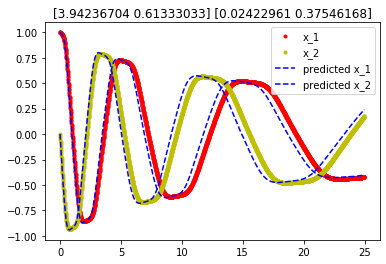

Shape of the dataframe is: (2500, 3)
Shape of the dataframe is: (2500, 3)
Target: x_component, CV Pearson R2 coefficient: 0.998989
Target: y_component, CV Pearson R2 coefficient: 0.999471
Average training score: 0.9992301551090264
Real data:


x_component  y_component
Strain                          
2          1.000000     0.000000
2          0.999001    -0.019970
2          0.998005    -0.039880
2          0.997010    -0.059731
2          0.996014    -0.079522
...             ...          ...
2         -0.423520     0.169531
2         -0.423345     0.171044
2         -0.423168     0.172556
2         -0.422988     0.174065
2         -0.422805     0.175573

[2500 rows x 2 columns]

Predicted data:


x_component  y_component
Time                           
0.00      1.000000     0.000000
0.01      0.998681    -0.020510
0.02      0.997362    -0.041011
0.03      0.996043    -0.061444
0.04      0.994724    -0.081549
...            ...          ...
24.95    -0.431075     0.040199
24.96    -0.431020     0.041856
24.97    -0.430965     0.043513
24.98    -0.430911     0.045167
24.99    -0.430856     0.046808

[2500 rows x 2 columns]

./source/predict_onestep.py:217: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  rmse = math.sqrt(quad(integrand,min(times),max(times),limit=200)[0])
./source/predict_onestep.py:222: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  rmsep = math.sqrt(quad(percent_integrand,min(times),max(times),limit=200)[0])


ML Fit: x_component 0.48742624234377796 RMSE percentage: 113.99117102127367
ML Fit: y_component 0.4925085179270281 RMSE percentage: 174.76972524383072
ML model aggregate error
Average RMSE: 0.48996738013540303
Total percentage error: 144.3804481325522


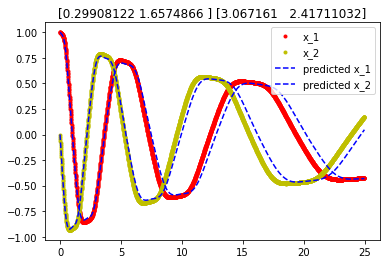

Shape of the dataframe is: (2500, 3)
Shape of the dataframe is: (2500, 3)
Target: x_component, CV Pearson R2 coefficient: 0.999756
Target: y_component, CV Pearson R2 coefficient: 0.999648
Average training score: 0.9997018151109817
Real data:


x_component  y_component
Strain                          
2          1.000000     0.000000
2          0.999001    -0.019970
2          0.998005    -0.039880
2          0.997010    -0.059731
2          0.996014    -0.079522
...             ...          ...
2         -0.423520     0.169531
2         -0.423345     0.171044
2         -0.423168     0.172556
2         -0.422988     0.174065
2         -0.422805     0.175573

[2500 rows x 2 columns]

Predicted data:


x_component  y_component
Time                           
0.00      1.000000     0.000000
0.01      0.999205    -0.018893
0.02      0.998409    -0.037787
0.03      0.997614    -0.056680
0.04      0.996818    -0.075573
...            ...          ...
24.95    -0.012194     0.434915
24.96    -0.010480     0.434817
24.97    -0.008766     0.434719
24.98    -0.007052     0.434621
24.99    -0.005338     0.434523

[2500 rows x 2 columns]

./source/predict_onestep.py:217: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  rmse = math.sqrt(quad(integrand,min(times),max(times),limit=200)[0])
./source/predict_onestep.py:222: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  rmsep = math.sqrt(quad(percent_integrand,min(times),max(times),limit=200)[0])


ML Fit: x_component 1.5418345598488086 RMSE percentage: 195.97074316895993
ML Fit: y_component 1.6957403336157335 RMSE percentage: 308.8249288943468
ML model aggregate error
Average RMSE: 1.618787446732271
Total percentage error: 252.39783603165336


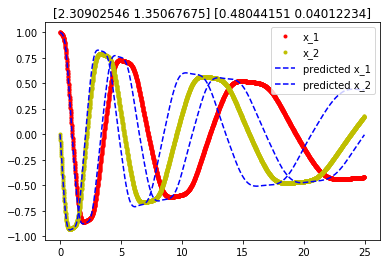

Shape of the dataframe is: (2500, 3)
Shape of the dataframe is: (2500, 3)
Target: x_component, CV Pearson R2 coefficient: 0.999253
Target: y_component, CV Pearson R2 coefficient: 0.999326
Average training score: 0.9992897145013444
Real data:


x_component  y_component
Strain                          
2          1.000000     0.000000
2          0.999001    -0.019970
2          0.998005    -0.039880
2          0.997010    -0.059731
2          0.996014    -0.079522
...             ...          ...
2         -0.423520     0.169531
2         -0.423345     0.171044
2         -0.423168     0.172556
2         -0.422988     0.174065
2         -0.422805     0.175573

[2500 rows x 2 columns]

Predicted data:


x_component  y_component
Time                           
0.00      1.000000     0.000000
0.01      0.998918    -0.020108
0.02      0.997881    -0.040173
0.03      0.996881    -0.060247
0.04      0.995912    -0.080312
...            ...          ...
24.95    -0.354772     0.250048
24.96    -0.354257     0.251108
24.97    -0.353735     0.252169
24.98    -0.353205     0.253228
24.99    -0.352675     0.254266

[2500 rows x 2 columns]

./source/predict_onestep.py:217: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  rmse = math.sqrt(quad(integrand,min(times),max(times),limit=200)[0])
./source/predict_onestep.py:222: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  rmsep = math.sqrt(quad(percent_integrand,min(times),max(times),limit=200)[0])


ML Fit: x_component 0.38668805685576135 RMSE percentage: 102.90767006938486
ML Fit: y_component 0.4186081137816107 RMSE percentage: 162.2796946765287
ML model aggregate error
Average RMSE: 0.402648085318686
Total percentage error: 132.59368237295678


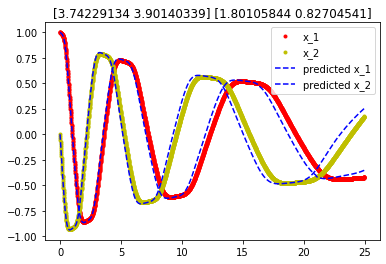

Shape of the dataframe is: (2500, 3)
Shape of the dataframe is: (2500, 3)
Target: x_component, CV Pearson R2 coefficient: 0.999892
Target: y_component, CV Pearson R2 coefficient: 0.999926
Average training score: 0.9999091799365079
Real data:


x_component  y_component
Strain                          
2          1.000000     0.000000
2          0.999001    -0.019970
2          0.998005    -0.039880
2          0.997010    -0.059731
2          0.996014    -0.079522
...             ...          ...
2         -0.423520     0.169531
2         -0.423345     0.171044
2         -0.423168     0.172556
2         -0.422988     0.174065
2         -0.422805     0.175573

[2500 rows x 2 columns]

Predicted data:


x_component  y_component
Time                           
0.00      1.000000     0.000000
0.01      0.999368    -0.020481
0.02      0.998737    -0.040726
0.03      0.998105    -0.060498
0.04      0.997473    -0.080059
...            ...          ...
24.95    -0.370961     0.285387
24.96    -0.370373     0.286459
24.97    -0.369785     0.287526
24.98    -0.369193     0.288591
24.99    -0.368598     0.289654

[2500 rows x 2 columns]

./source/predict_onestep.py:217: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  rmse = math.sqrt(quad(integrand,min(times),max(times),limit=200)[0])
./source/predict_onestep.py:222: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  rmsep = math.sqrt(quad(percent_integrand,min(times),max(times),limit=200)[0])


ML Fit: x_component 0.5500395074302591 RMSE percentage: 121.52439079248474
ML Fit: y_component 0.5830006012448662 RMSE percentage: 182.85211943964427
ML model aggregate error
Average RMSE: 0.5665200543375626
Total percentage error: 152.18825511606448


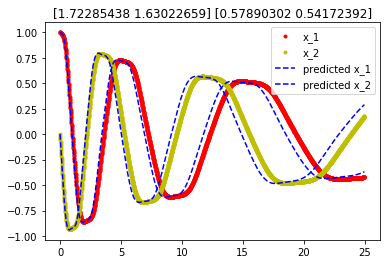

Shape of the dataframe is: (2500, 3)
Shape of the dataframe is: (2500, 3)
Target: x_component, CV Pearson R2 coefficient: 0.998789
Target: y_component, CV Pearson R2 coefficient: 0.999226
Average training score: 0.9990071892384798
Real data:


x_component  y_component
Strain                          
2          1.000000     0.000000
2          0.999001    -0.019970
2          0.998005    -0.039880
2          0.997010    -0.059731
2          0.996014    -0.079522
...             ...          ...
2         -0.423520     0.169531
2         -0.423345     0.171044
2         -0.423168     0.172556
2         -0.422988     0.174065
2         -0.422805     0.175573

[2500 rows x 2 columns]

Predicted data:


x_component  y_component
Time                           
0.00      1.000000     0.000000
0.01      0.998699    -0.020449
0.02      0.997398    -0.040741
0.03      0.996097    -0.061017
0.04      0.994796    -0.081270
...            ...          ...
24.95    -0.422501     0.085181
24.96    -0.422383     0.086712
24.97    -0.422264     0.088241
24.98    -0.422145     0.089770
24.99    -0.422026     0.091299

[2500 rows x 2 columns]

./source/predict_onestep.py:217: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  rmse = math.sqrt(quad(integrand,min(times),max(times),limit=200)[0])
./source/predict_onestep.py:222: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  rmsep = math.sqrt(quad(percent_integrand,min(times),max(times),limit=200)[0])


ML Fit: x_component 0.2546067772675735 RMSE percentage: 63.84719646236764
ML Fit: y_component 0.2618407706361466 RMSE percentage: 131.4998380510292
ML model aggregate error
Average RMSE: 0.25822377395186
Total percentage error: 97.67351725669842


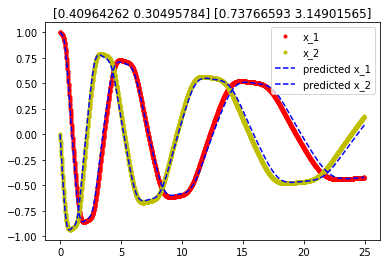

Shape of the dataframe is: (2500, 3)
Shape of the dataframe is: (2500, 3)
Target: x_component, CV Pearson R2 coefficient: 0.999712
Target: y_component, CV Pearson R2 coefficient: 0.999798
Average training score: 0.9997550078449329
Real data:


x_component  y_component
Strain                          
2          1.000000     0.000000
2          0.999001    -0.019970
2          0.998005    -0.039880
2          0.997010    -0.059731
2          0.996014    -0.079522
...             ...          ...
2         -0.423520     0.169531
2         -0.423345     0.171044
2         -0.423168     0.172556
2         -0.422988     0.174065
2         -0.422805     0.175573

[2500 rows x 2 columns]

Predicted data:


x_component  y_component
Time                           
0.00      1.000000     0.000000
0.01      0.999175    -0.020425
0.02      0.998373    -0.040633
0.03      0.997579    -0.060835
0.04      0.996786    -0.081012
...            ...          ...
24.95    -0.433261     0.280780
24.96    -0.432880     0.282386
24.97    -0.432483     0.283975
24.98    -0.432066     0.285559
24.99    -0.431642     0.287138

[2500 rows x 2 columns]

./source/predict_onestep.py:217: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  rmse = math.sqrt(quad(integrand,min(times),max(times),limit=200)[0])
./source/predict_onestep.py:222: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  rmsep = math.sqrt(quad(percent_integrand,min(times),max(times),limit=200)[0])


ML Fit: x_component 0.22960586652399012 RMSE percentage: 80.67382790188952
ML Fit: y_component 0.2673842488970069 RMSE percentage: 139.5026350071141
ML model aggregate error
Average RMSE: 0.2484950577104985
Total percentage error: 110.08823145450182


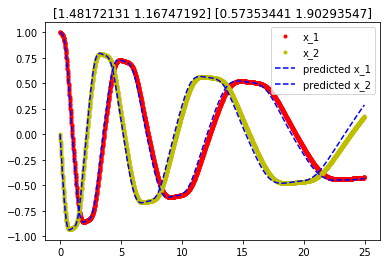

Shape of the dataframe is: (2500, 3)
Shape of the dataframe is: (2500, 3)
Target: x_component, CV Pearson R2 coefficient: 0.998663
Target: y_component, CV Pearson R2 coefficient: 0.998536
Average training score: 0.9985993472710648
Real data:


x_component  y_component
Strain                          
2          1.000000     0.000000
2          0.999001    -0.019970
2          0.998005    -0.039880
2          0.997010    -0.059731
2          0.996014    -0.079522
...             ...          ...
2         -0.423520     0.169531
2         -0.423345     0.171044
2         -0.423168     0.172556
2         -0.422988     0.174065
2         -0.422805     0.175573

[2500 rows x 2 columns]

Predicted data:


x_component  y_component
Time                           
0.00      1.000000     0.000000
0.01      0.998532    -0.020133
0.02      0.997117    -0.040208
0.03      0.995734    -0.060027
0.04      0.994450    -0.079840
...            ...          ...
24.95    -0.414657     0.268176
24.96    -0.414152     0.269632
24.97    -0.413643     0.271091
24.98    -0.413127     0.272550
24.99    -0.412596     0.274004

[2500 rows x 2 columns]

./source/predict_onestep.py:217: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  rmse = math.sqrt(quad(integrand,min(times),max(times),limit=200)[0])
./source/predict_onestep.py:222: IntegrationWarning: The maximum number of subdivisions (200) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  rmsep = math.sqrt(quad(percent_integrand,min(times),max(times),limit=200)[0])


ML Fit: x_component 0.15464132146905246 RMSE percentage: 51.57099100382069


./source/predict_onestep.py:222: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  rmsep = math.sqrt(quad(percent_integrand,min(times),max(times),limit=200)[0])


ML Fit: y_component 0.20724809613110173 RMSE percentage: 135.74878423542106
ML model aggregate error
Average RMSE: 0.1809447088000771
Total percentage error: 93.65988761962087


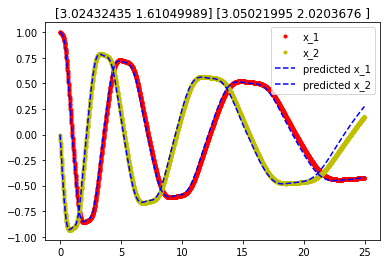

Shape of the dataframe is: (2500, 3)
Shape of the dataframe is: (2500, 3)
Target: x_component, CV Pearson R2 coefficient: 0.998972
Target: y_component, CV Pearson R2 coefficient: 0.999088
Average training score: 0.9990299914685483
Real data:


x_component  y_component
Strain                          
2          1.000000     0.000000
2          0.999001    -0.019970
2          0.998005    -0.039880
2          0.997010    -0.059731
2          0.996014    -0.079522
...             ...          ...
2         -0.423520     0.169531
2         -0.423345     0.171044
2         -0.423168     0.172556
2         -0.422988     0.174065
2         -0.422805     0.175573

[2500 rows x 2 columns]

Predicted data:


x_component  y_component
Time                           
0.00      1.000000     0.000000
0.01      0.999246    -0.019460
0.02      0.998491    -0.038920
0.03      0.997737    -0.058379
0.04      0.996983    -0.077839
...            ...          ...
24.95    -0.037255     0.410896
24.96    -0.035778     0.410807
24.97    -0.034331     0.410718
24.98    -0.032900     0.410629
24.99    -0.031469     0.410540

[2500 rows x 2 columns]

./source/predict_onestep.py:217: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  rmse = math.sqrt(quad(integrand,min(times),max(times),limit=200)[0])
./source/predict_onestep.py:222: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  rmsep = math.sqrt(quad(percent_integrand,min(times),max(times),limit=200)[0])


ML Fit: x_component 1.6976289539646752 RMSE percentage: 198.95427243157837
ML Fit: y_component 1.8357623818941569 RMSE percentage: 308.1123357781392
ML model aggregate error
Average RMSE: 1.7666956679294161
Total percentage error: 253.53330410485876


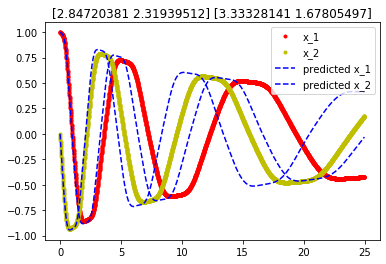

Shape of the dataframe is: (2500, 3)
Shape of the dataframe is: (2500, 3)
Target: x_component, CV Pearson R2 coefficient: 0.998511
Target: y_component, CV Pearson R2 coefficient: 0.997061
Average training score: 0.9977863567292278
Real data:


x_component  y_component
Strain                          
2          1.000000     0.000000
2          0.999001    -0.019970
2          0.998005    -0.039880
2          0.997010    -0.059731
2          0.996014    -0.079522
...             ...          ...
2         -0.423520     0.169531
2         -0.423345     0.171044
2         -0.423168     0.172556
2         -0.422988     0.174065
2         -0.422805     0.175573

[2500 rows x 2 columns]

Predicted data:


x_component  y_component
Time                           
0.00      1.000000     0.000000
0.01      0.998870    -0.020790
0.02      0.997741    -0.041594
0.03      0.996611    -0.062351
0.04      0.995482    -0.082307
...            ...          ...
24.95    -0.359620     0.414516
24.96    -0.358020     0.415392
24.97    -0.356415     0.416252
24.98    -0.354799     0.417111
24.99    -0.353174     0.417964

[2500 rows x 2 columns]

./source/predict_onestep.py:217: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  rmse = math.sqrt(quad(integrand,min(times),max(times),limit=200)[0])
./source/predict_onestep.py:222: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  rmsep = math.sqrt(quad(percent_integrand,min(times),max(times),limit=200)[0])


ML Fit: x_component 0.5014898991790564 RMSE percentage: 115.0464261793123
ML Fit: y_component 0.6124213648433299 RMSE percentage: 176.48930277209251
ML model aggregate error
Average RMSE: 0.5569556320111931
Total percentage error: 145.76786447570242


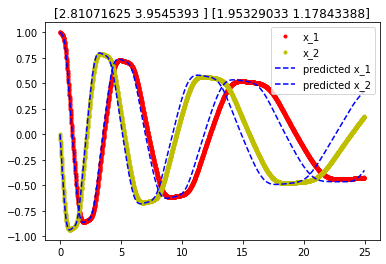

In [78]:
from utils import *
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor

# now for one-step method
# now we do the same for the test data
mse_onestep_list = []
time_points, test_data = harmonic.simulate_custom(xinit=1, yinit=0)

feature_list = [] # here we do not have external time-series or control variables
target_list = ['x_component', 'y_component']
df_test = create_data(test_data, time_points, cols=target_list, num=2)

for _ in range(10):
    # generate data with random initial conditions
    xi = np.random.uniform(0, 4, 2)
    yi = np.random.uniform(0, 4, 2)
    time_points, data1 = harmonic.simulate_custom(xinit=xi[0], yinit=yi[0])    
    time_points, data2 = harmonic.simulate_custom(xinit=xi[1], yinit=yi[1])
                                                  
    # now generate and augment the training dataset
    df1 = create_data(data1, time_points, cols=target_list, num=0)
    df2 = create_data(data2, time_points, cols=target_list, num=1)
    df = pd.concat([df1, df2])
    df_train = train_onestep.generate_dataset(df, [0,1],feature_list, target_list, n_dim=2500)

    rf_model = RandomForestRegressor(n_estimators=20)
    figure_path = './plots/'
    rf_dict, score_dict = train_onestep.train_classic(df_train, rf_model, plot=False,model_type='random_forest', figure_path=figure_path)
    time_points, predictions = predict_onestep.predict_integrate(df_test, df, rf_dict, target_list, feature_list, title='test', plot=False,model_type='random_forest', subplots=(2,1), bio=False)
    predictions = predictions.to_numpy()
    mse1 = predict_lmmNet.compute_MSE(predictions, test_data[0], 0)
    mse2 = predict_lmmNet.compute_MSE(predictions, test_data[0], 1)
    mse_onestep_list.append((mse1, mse2))
    
    # plot
    plt.plot(time_points, test_data[0,:,0], 'r.', label='x_1')
    plt.plot(time_points, test_data[0,:,1], 'y.', label='x_2')
    plt.plot(time_points, predictions[:,0], 'b--', label='predicted x_1')
    plt.plot(time_points, predictions[:,1], 'b--', label='predicted x_2')
    plt.title(str(xi) + " " + str(yi))
    plt.legend()
    plt.show()

## 0. Wasserstein Distance and KL Divergence

Shape of the dataframe is: (2500, 3)
Shape of the dataframe is: (2500, 3)
Shape of the dataframe is: (2500, 3)
Target: x_component, CV Pearson R2 coefficient: 0.999964
Target: y_component, CV Pearson R2 coefficient: 0.999973
Average training score: 0.99996889174363
Real data:


x_component  y_component
Strain                          
2          1.000000     0.000000
2          0.999001    -0.019970
2          0.998005    -0.039880
2          0.997010    -0.059731
2          0.996014    -0.079522
...             ...          ...
2         -0.423520     0.169531
2         -0.423345     0.171044
2         -0.423168     0.172556
2         -0.422988     0.174065
2         -0.422805     0.175573

[2500 rows x 2 columns]

Predicted data:


x_component  y_component
Time                           
0.00      1.000000     0.000000
0.01      0.999359    -0.018596
0.02      0.998718    -0.037112
0.03      0.998077    -0.055522
0.04      0.997435    -0.073856
...            ...          ...
24.95    -0.301601     0.381729
24.96    -0.300407     0.382400
24.97    -0.299200     0.383067
24.98    -0.297985     0.383731
24.99    -0.296766     0.384372

[2500 rows x 2 columns]

./source/predict_onestep.py:217: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  rmse = math.sqrt(quad(integrand,min(times),max(times),limit=200)[0])
./source/predict_onestep.py:222: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  rmsep = math.sqrt(quad(percent_integrand,min(times),max(times),limit=200)[0])


ML Fit: x_component 0.9230932917974876 RMSE percentage: 151.2671361041168
ML Fit: y_component 1.0002825152613748 RMSE percentage: 246.18696170373968
ML model aggregate error
Average RMSE: 0.9616879035294312
Total percentage error: 198.72704890392822


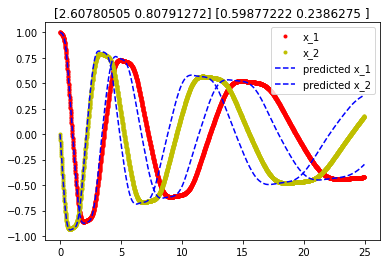

Shape of the dataframe is: (2500, 3)
Shape of the dataframe is: (2500, 3)
Target: x_component, CV Pearson R2 coefficient: 0.999937
Target: y_component, CV Pearson R2 coefficient: 0.999954
Average training score: 0.9999455651510523
Real data:


x_component  y_component
Strain                          
2          1.000000     0.000000
2          0.999001    -0.019970
2          0.998005    -0.039880
2          0.997010    -0.059731
2          0.996014    -0.079522
...             ...          ...
2         -0.423520     0.169531
2         -0.423345     0.171044
2         -0.423168     0.172556
2         -0.422988     0.174065
2         -0.422805     0.175573

[2500 rows x 2 columns]

Predicted data:


x_component  y_component
Time                           
0.00      1.000000     0.000000
0.01      0.999010    -0.019891
0.02      0.998021    -0.039766
0.03      0.997032    -0.059533
0.04      0.996044    -0.079243
...            ...          ...
24.95    -0.425281     0.160352
24.96    -0.425252     0.161897
24.97    -0.425221     0.163441
24.98    -0.425193     0.164985
24.99    -0.425169     0.166530

[2500 rows x 2 columns]

./source/predict_onestep.py:217: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  rmse = math.sqrt(quad(integrand,min(times),max(times),limit=200)[0])
./source/predict_onestep.py:222: IntegrationWarning: The maximum number of subdivisions (200) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  rmsep = math.sqrt(quad(percent_integrand,min(times),max(times),limit=200)[0])


ML Fit: x_component 0.025605255246747543 RMSE percentage: 19.611347339348914


./source/predict_onestep.py:222: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  rmsep = math.sqrt(quad(percent_integrand,min(times),max(times),limit=200)[0])


ML Fit: y_component 0.027905945475454774 RMSE percentage: 28.62134748222437
ML model aggregate error
Average RMSE: 0.02675560036110116
Total percentage error: 24.11634741078664


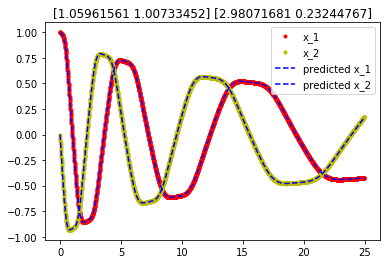

Shape of the dataframe is: (2500, 3)
Shape of the dataframe is: (2500, 3)
Target: x_component, CV Pearson R2 coefficient: 0.999916
Target: y_component, CV Pearson R2 coefficient: 0.999943
Average training score: 0.9999293870697865
Real data:


x_component  y_component
Strain                          
2          1.000000     0.000000
2          0.999001    -0.019970
2          0.998005    -0.039880
2          0.997010    -0.059731
2          0.996014    -0.079522
...             ...          ...
2         -0.423520     0.169531
2         -0.423345     0.171044
2         -0.423168     0.172556
2         -0.422988     0.174065
2         -0.422805     0.175573

[2500 rows x 2 columns]

Predicted data:


x_component  y_component
Time                           
0.00      1.000000     0.000000
0.01      0.999315    -0.020656
0.02      0.998631    -0.041311
0.03      0.997946    -0.061919
0.04      0.997261    -0.082405
...            ...          ...
24.95    -0.233727     0.416592
24.96    -0.232206     0.416871
24.97    -0.230679     0.417143
24.98    -0.229149     0.417414
24.99    -0.227618     0.417675

[2500 rows x 2 columns]

./source/predict_onestep.py:217: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  rmse = math.sqrt(quad(integrand,min(times),max(times),limit=200)[0])
./source/predict_onestep.py:222: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  rmsep = math.sqrt(quad(percent_integrand,min(times),max(times),limit=200)[0])


ML Fit: x_component 1.079767764059974 RMSE percentage: 164.64013739690762
ML Fit: y_component 1.1860323040335445 RMSE percentage: 273.01689286633876
ML model aggregate error
Average RMSE: 1.1329000340467594
Total percentage error: 218.8285151316232


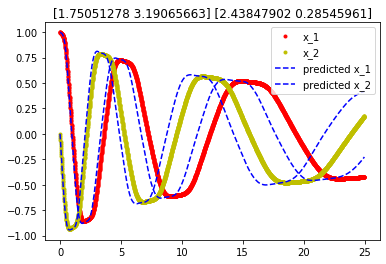

Shape of the dataframe is: (2500, 3)
Shape of the dataframe is: (2500, 3)
Target: x_component, CV Pearson R2 coefficient: 0.999868
Target: y_component, CV Pearson R2 coefficient: 0.999817
Average training score: 0.9998426637780412
Real data:


x_component  y_component
Strain                          
2          1.000000     0.000000
2          0.999001    -0.019970
2          0.998005    -0.039880
2          0.997010    -0.059731
2          0.996014    -0.079522
...             ...          ...
2         -0.423520     0.169531
2         -0.423345     0.171044
2         -0.423168     0.172556
2         -0.422988     0.174065
2         -0.422805     0.175573

[2500 rows x 2 columns]

Predicted data:


x_component  y_component
Time                           
0.00      1.000000     0.000000
0.01      0.999282    -0.021145
0.02      0.998565    -0.042268
0.03      0.997847    -0.063309
0.04      0.997130    -0.084300
...            ...          ...
24.95    -0.181529     0.401820
24.96    -0.180136     0.401821
24.97    -0.178743     0.401816
24.98    -0.177349     0.401807
24.99    -0.175956     0.401796

[2500 rows x 2 columns]

./source/predict_onestep.py:217: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  rmse = math.sqrt(quad(integrand,min(times),max(times),limit=200)[0])
./source/predict_onestep.py:222: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  rmsep = math.sqrt(quad(percent_integrand,min(times),max(times),limit=200)[0])


ML Fit: x_component 1.3898128187585392 RMSE percentage: 187.1743549877248
ML Fit: y_component 1.4924905154252075 RMSE percentage: 288.4598841623641
ML model aggregate error
Average RMSE: 1.4411516670918734
Total percentage error: 237.81711957504444


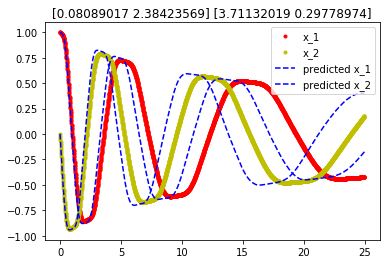

Shape of the dataframe is: (2500, 3)
Shape of the dataframe is: (2500, 3)
Target: x_component, CV Pearson R2 coefficient: 0.999837
Target: y_component, CV Pearson R2 coefficient: 0.999891
Average training score: 0.9998641692466879
Real data:


x_component  y_component
Strain                          
2          1.000000     0.000000
2          0.999001    -0.019970
2          0.998005    -0.039880
2          0.997010    -0.059731
2          0.996014    -0.079522
...             ...          ...
2         -0.423520     0.169531
2         -0.423345     0.171044
2         -0.423168     0.172556
2         -0.422988     0.174065
2         -0.422805     0.175573

[2500 rows x 2 columns]

Predicted data:


x_component  y_component
Time                           
0.00      1.000000     0.000000
0.01      0.999249    -0.021365
0.02      0.998497    -0.042745
0.03      0.997746    -0.064086
0.04      0.996994    -0.085411
...            ...          ...
24.95    -0.046980     0.413426
24.96    -0.045472     0.413300
24.97    -0.043965     0.413173
24.98    -0.042460     0.413046
24.99    -0.040955     0.412919

[2500 rows x 2 columns]

./source/predict_onestep.py:217: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  rmse = math.sqrt(quad(integrand,min(times),max(times),limit=200)[0])
./source/predict_onestep.py:222: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  rmsep = math.sqrt(quad(percent_integrand,min(times),max(times),limit=200)[0])


ML Fit: x_component 1.5907533879744384 RMSE percentage: 195.5365701332553
ML Fit: y_component 1.7314872005585267 RMSE percentage: 306.9577135335055
ML model aggregate error
Average RMSE: 1.6611202942664827
Total percentage error: 251.24714183338043


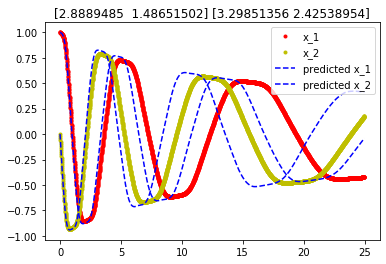

Shape of the dataframe is: (2500, 3)
Shape of the dataframe is: (2500, 3)
Target: x_component, CV Pearson R2 coefficient: 0.999995
Target: y_component, CV Pearson R2 coefficient: 0.999996
Average training score: 0.9999956916217798
Real data:


x_component  y_component
Strain                          
2          1.000000     0.000000
2          0.999001    -0.019970
2          0.998005    -0.039880
2          0.997010    -0.059731
2          0.996014    -0.079522
...             ...          ...
2         -0.423520     0.169531
2         -0.423345     0.171044
2         -0.423168     0.172556
2         -0.422988     0.174065
2         -0.422805     0.175573

[2500 rows x 2 columns]

Predicted data:


x_component  y_component
Time                           
0.00      1.000000     0.000000
0.01      0.999151    -0.018986
0.02      0.998301    -0.037930
0.03      0.997452    -0.056886
0.04      0.996602    -0.075843
...            ...          ...
24.95     0.016502     0.425956
24.96     0.018122     0.425822
24.97     0.019741     0.425688
24.98     0.021361     0.425554
24.99     0.022980     0.425420

[2500 rows x 2 columns]

./source/predict_onestep.py:217: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  rmse = math.sqrt(quad(integrand,min(times),max(times),limit=200)[0])
./source/predict_onestep.py:222: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  rmsep = math.sqrt(quad(percent_integrand,min(times),max(times),limit=200)[0])


ML Fit: x_component 1.4973968996168547 RMSE percentage: 192.9238312195357
ML Fit: y_component 1.6642820554006492 RMSE percentage: 307.39138805697206
ML model aggregate error
Average RMSE: 1.580839477508752
Total percentage error: 250.1576096382539


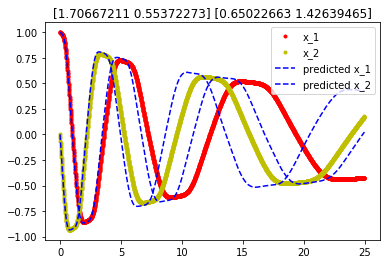

Shape of the dataframe is: (2500, 3)
Shape of the dataframe is: (2500, 3)
Target: x_component, CV Pearson R2 coefficient: 0.999841
Target: y_component, CV Pearson R2 coefficient: 0.999840
Average training score: 0.9998404240279557
Real data:


x_component  y_component
Strain                          
2          1.000000     0.000000
2          0.999001    -0.019970
2          0.998005    -0.039880
2          0.997010    -0.059731
2          0.996014    -0.079522
...             ...          ...
2         -0.423520     0.169531
2         -0.423345     0.171044
2         -0.423168     0.172556
2         -0.422988     0.174065
2         -0.422805     0.175573

[2500 rows x 2 columns]

Predicted data:


x_component  y_component
Time                           
0.00      1.000000     0.000000
0.01      0.999236    -0.021131
0.02      0.998472    -0.042248
0.03      0.997708    -0.063360
0.04      0.996943    -0.084402
...            ...          ...
24.95     0.007153     0.418782
24.96     0.008701     0.418702
24.97     0.010245     0.418621
24.98     0.011789     0.418540
24.99     0.013333     0.418459

[2500 rows x 2 columns]

./source/predict_onestep.py:217: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  rmse = math.sqrt(quad(integrand,min(times),max(times),limit=200)[0])
./source/predict_onestep.py:222: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  rmsep = math.sqrt(quad(percent_integrand,min(times),max(times),limit=200)[0])


ML Fit: x_component 1.6724047777881201 RMSE percentage: 204.51568101766057
ML Fit: y_component 1.8191905807456175 RMSE percentage: 309.02540612104747
ML model aggregate error
Average RMSE: 1.7457976792668688
Total percentage error: 256.770543569354


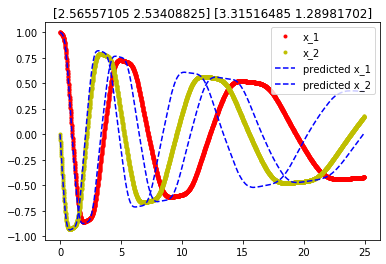

Shape of the dataframe is: (2500, 3)
Shape of the dataframe is: (2500, 3)
Target: x_component, CV Pearson R2 coefficient: 0.999969
Target: y_component, CV Pearson R2 coefficient: 0.999974
Average training score: 0.9999714299862186
Real data:


x_component  y_component
Strain                          
2          1.000000     0.000000
2          0.999001    -0.019970
2          0.998005    -0.039880
2          0.997010    -0.059731
2          0.996014    -0.079522
...             ...          ...
2         -0.423520     0.169531
2         -0.423345     0.171044
2         -0.423168     0.172556
2         -0.422988     0.174065
2         -0.422805     0.175573

[2500 rows x 2 columns]

Predicted data:


x_component  y_component
Time                           
0.00      1.000000     0.000000
0.01      0.998621    -0.020501
0.02      0.997243    -0.040911
0.03      0.995864    -0.061268
0.04      0.994485    -0.081439
...            ...          ...
24.95    -0.452332     0.161232
24.96    -0.452381     0.163071
24.97    -0.452426     0.164911
24.98    -0.452469     0.166751
24.99    -0.452510     0.168591

[2500 rows x 2 columns]

./source/predict_onestep.py:217: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  rmse = math.sqrt(quad(integrand,min(times),max(times),limit=200)[0])
./source/predict_onestep.py:222: IntegrationWarning: The maximum number of subdivisions (200) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  rmsep = math.sqrt(quad(percent_integrand,min(times),max(times),limit=200)[0])


ML Fit: x_component 0.17084634173476682 RMSE percentage: 48.65339285135579
ML Fit: y_component 0.1628082572929316 RMSE percentage: 69.46866533835545
ML model aggregate error
Average RMSE: 0.16682729951384923
Total percentage error: 59.06102909485562


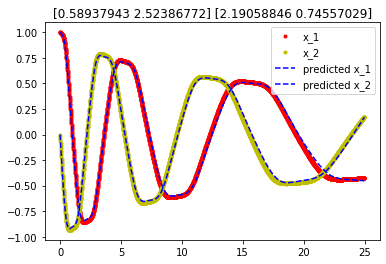

Shape of the dataframe is: (2500, 3)
Shape of the dataframe is: (2500, 3)
Target: x_component, CV Pearson R2 coefficient: 0.999858
Target: y_component, CV Pearson R2 coefficient: 0.999851
Average training score: 0.9998541279524482
Real data:


x_component  y_component
Strain                          
2          1.000000     0.000000
2          0.999001    -0.019970
2          0.998005    -0.039880
2          0.997010    -0.059731
2          0.996014    -0.079522
...             ...          ...
2         -0.423520     0.169531
2         -0.423345     0.171044
2         -0.423168     0.172556
2         -0.422988     0.174065
2         -0.422805     0.175573

[2500 rows x 2 columns]

Predicted data:


x_component  y_component
Time                           
0.00      1.000000     0.000000
0.01      0.999133    -0.019997
0.02      0.998266    -0.039961
0.03      0.997400    -0.059907
0.04      0.996533    -0.079801
...            ...          ...
24.95    -0.412596     0.102871
24.96    -0.412403     0.104368
24.97    -0.412211     0.105864
24.98    -0.412017     0.107358
24.99    -0.411821     0.108850

[2500 rows x 2 columns]

./source/predict_onestep.py:217: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  rmse = math.sqrt(quad(integrand,min(times),max(times),limit=200)[0])
./source/predict_onestep.py:222: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  rmsep = math.sqrt(quad(percent_integrand,min(times),max(times),limit=200)[0])


ML Fit: x_component 0.3196725927259335 RMSE percentage: 93.81886017073788
ML Fit: y_component 0.3111810847797561 RMSE percentage: 132.09821187875656
ML model aggregate error
Average RMSE: 0.31542683875284483
Total percentage error: 112.95853602474723


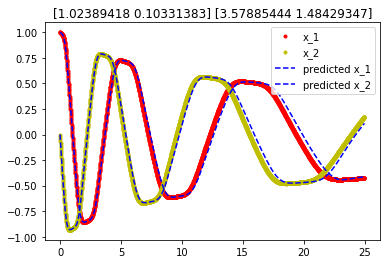

Shape of the dataframe is: (2500, 3)
Shape of the dataframe is: (2500, 3)
Target: x_component, CV Pearson R2 coefficient: 0.999859
Target: y_component, CV Pearson R2 coefficient: 0.999892
Average training score: 0.9998757912185763
Real data:


x_component  y_component
Strain                          
2          1.000000     0.000000
2          0.999001    -0.019970
2          0.998005    -0.039880
2          0.997010    -0.059731
2          0.996014    -0.079522
...             ...          ...
2         -0.423520     0.169531
2         -0.423345     0.171044
2         -0.423168     0.172556
2         -0.422988     0.174065
2         -0.422805     0.175573

[2500 rows x 2 columns]

Predicted data:


x_component  y_component
Time                           
0.00      1.000000     0.000000
0.01      0.998813    -0.020408
0.02      0.997626    -0.040704
0.03      0.996439    -0.060880
0.04      0.995251    -0.080909
...            ...          ...
24.95    -0.397864    -0.039025
24.96    -0.397677    -0.037584
24.97    -0.397490    -0.036150
24.98    -0.397303    -0.034727
24.99    -0.397116    -0.033318

[2500 rows x 2 columns]

./source/predict_onestep.py:217: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  rmse = math.sqrt(quad(integrand,min(times),max(times),limit=200)[0])
./source/predict_onestep.py:222: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  rmsep = math.sqrt(quad(percent_integrand,min(times),max(times),limit=200)[0])


ML Fit: x_component 0.6094833942092162 RMSE percentage: 126.779335305756
ML Fit: y_component 0.6140119140717266 RMSE percentage: 207.41819198275618
ML model aggregate error
Average RMSE: 0.6117476541404714
Total percentage error: 167.0987636442561


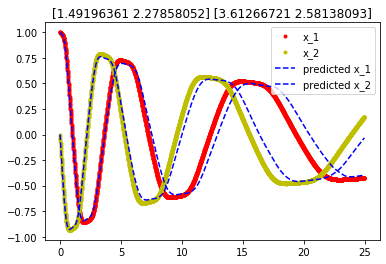

In [77]:
from scipy.stats import wasserstein_distance
# now for one-step method
# now we do the same for the test data
# and use KL divergence and Wasserstein distance

#kl_onestep_list = []
was_onestep_list = []
time_points, test_data = harmonic.simulate_custom(xinit=1, yinit=0)

feature_list = [] # here we do not have external time-series or control variables
target_list = ['x_component', 'y_component']
df_test = create_data(test_data, time_points, cols=target_list, num=2)

for _ in range(10):
    # generate data with random initial conditions
    xi = np.random.uniform(0, 4, 2)
    yi = np.random.uniform(0, 4, 2)
    time_points, data1 = harmonic.simulate_custom(xinit=xi[0], yinit=yi[0])    
    time_points, data2 = harmonic.simulate_custom(xinit=xi[1], yinit=yi[1])
                                                  
    # now generate and augment the training dataset
    df1 = create_data(data1, time_points, cols=target_list, num=0)
    df2 = create_data(data2, time_points, cols=target_list, num=1)
    df = pd.concat([df1, df2])
    df_train = train_onestep.generate_dataset(df, [0,1],feature_list, target_list, n_dim=30000)

    rf_model = RandomForestRegressor(n_estimators=20)
    figure_path = './plots/'
    rf_dict, score_dict = train_onestep.train_classic(df_train, rf_model, plot=False,model_type='random_forest', figure_path=figure_path)
    time_points, predictions = predict_onestep.predict_integrate(df_test, df, rf_dict, target_list, feature_list, title='test', plot=False,model_type='random_forest', subplots=(2,1), bio=False)
    predictions = predictions.to_numpy()
    was1 = wasserstein_distance(predictions[:,0], test_data[0,:,0])
    was2 = wasserstein_distance(predictions[:,1], test_data[0,:,1])
    was_onestep_list.append((was1, was2))
    
    # plot
    plt.plot(time_points, test_data[0,:,0], 'r.', label='x_1')
    plt.plot(time_points, test_data[0,:,1], 'y.', label='x_2')
    plt.plot(time_points, predictions[:,0], 'b--', label='predicted x_1')
    plt.plot(time_points, predictions[:,1], 'b--', label='predicted x_2')
    plt.title(str(xi) + " " + str(yi))
    plt.legend()
    plt.show()

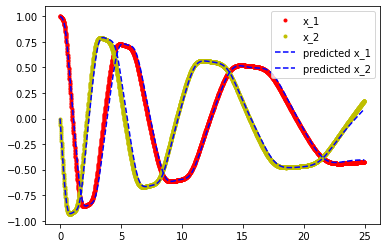

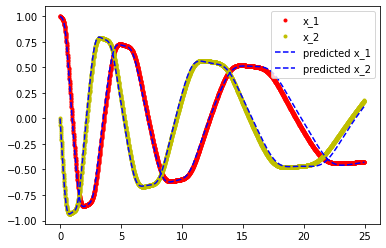

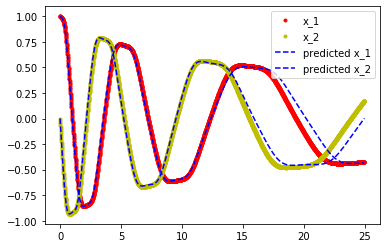

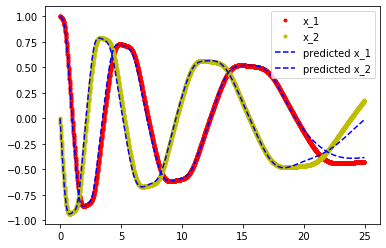

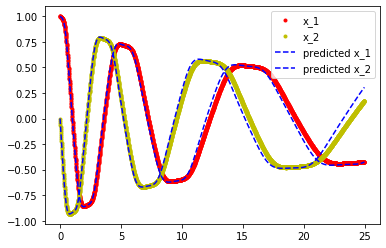

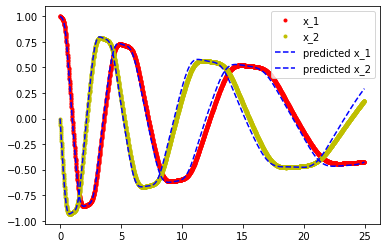

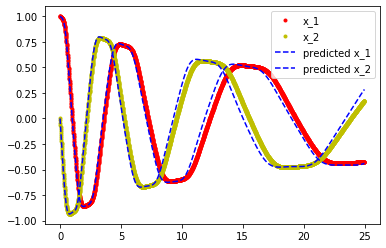

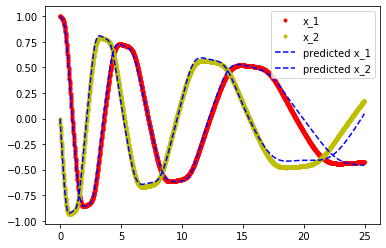

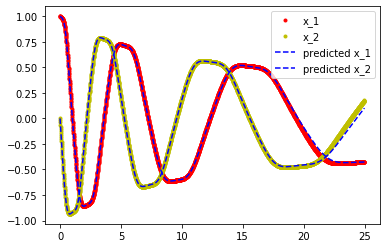

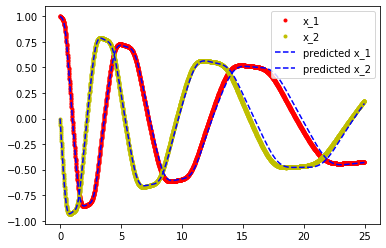

In [88]:
# wasserstein distance with lmmNet
was_lmmnet_list = []
time_points, test_data = harmonic.simulate_custom(xinit=1, yinit=0)

for _ in range(10):
    # generate data with random initial conditions
    xi = np.random.uniform(0, 4, 1)[0]
    yi = np.random.uniform(0, 4, 1)[0]
    time_points, cubic_data = harmonic.simulate_custom(xinit=xi, yinit=yi)
    model = train_lmmNet.train_easy(time_points, cubic_data)
    x0 = test_data[0,0,:] # initial conditions
    predicted_traj = odeint(lambda x, t: predict_lmmNet.predict_fn(x, t, model), x0, time_points)
    was1 = wasserstein_distance(predicted_traj[:,0], test_data[0,:,0])
    was2 = wasserstein_distance(predicted_traj[:,1], test_data[0,:,1])
    was_lmmnet_list.append((was1, was2))
    
    # plot
    plt.plot(time_points, test_data[0,:,0], 'r.', label='x_1')
    plt.plot(time_points, test_data[0,:,1], 'y.', label='x_2')
    plt.plot(time_points, predicted_traj[:,0], 'b--', label='predicted x_1')
    plt.plot(time_points, predicted_traj[:,1], 'b--', label='predicted x_2')
    plt.legend()
    plt.show()

In [ ]:
# KL and DTW with lmmNet

from scipy.stats import entropy

kl_lmmnet_list = []
dtw_lmmnet_list = []
time_points, test_data = harmonic.simulate_custom(xinit=1, yinit=0)

for _ in range(10):
    # generate data with random initial conditions
    xi = np.random.uniform(0, 4, 1)[0]
    yi = np.random.uniform(0, 4, 1)[0]
    time_points, cubic_data = harmonic.simulate_custom(xinit=xi, yinit=yi)
    model = train_lmmNet.train_easy(time_points, cubic_data)
    x0 = test_data[0,0,:] # initial conditions
    predicted_traj = odeint(lambda x, t: predict_lmmNet.predict_fn(x, t, model), x0, time_points)
    kl1 = entropy(predicted_traj[:,0], test_data[0,:,0])
    kl2 = entropy(predicted_traj[:,1], test_data[0,:,1])
    kl_lmmnet_list.append((kl1, kl2))
    
    # plot
    plt.plot(time_points, test_data[0,:,0], 'r.', label='x_1')
    plt.plot(time_points, test_data[0,:,1], 'y.', label='x_2')
    plt.plot(time_points, predicted_traj[:,0], 'b--', label='predicted x_1')
    plt.plot(time_points, predicted_traj[:,1], 'b--', label='predicted x_2')
    plt.legend()
    plt.show()

## 1. Performance improvement with Epochs

Text(0.5, 1.0, 'Predicted Trajectories of 2D Yeast Glycolytic Oscillator')

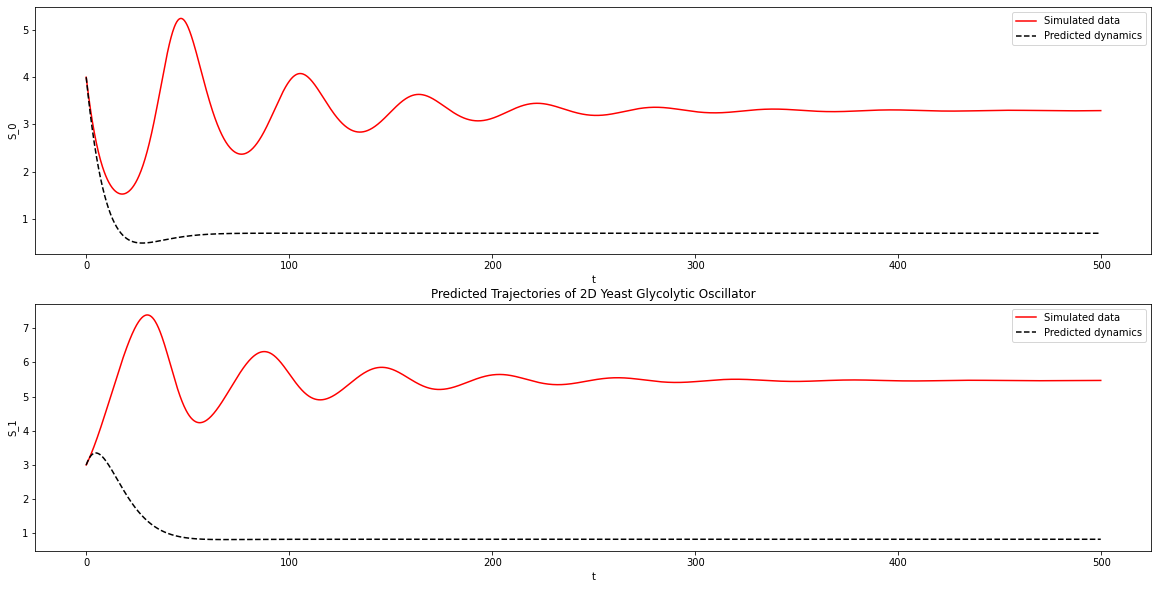

In [4]:
# test if it works for 5 epochs
net = lmmNet(h, data, M, scheme, hidden_layer_units)
N_Iter = 5
net.train(N_Iter)
pred = odeint(predict_fn, x0, time_points, args=(net,))

plt.figure(figsize=(20, 10))

for species in range(2):
    plt.subplot(2,1,species + 1)
    plt.plot(time_points, data[0, :, species], 'r-', label='Simulated data')
    plt.plot(time_points, pred[:,species], 'k--', label='Predicted dynamics')
    plt.xlabel('t')
    plt.ylabel('S_' + str(species))
    plt.legend()
    
plt.title('Predicted Trajectories of 2D Yeast Glycolytic Oscillator')


Text(0.5, 1.0, 'Predicted Trajectories of 2D Yeast Glycolytic Oscillator')

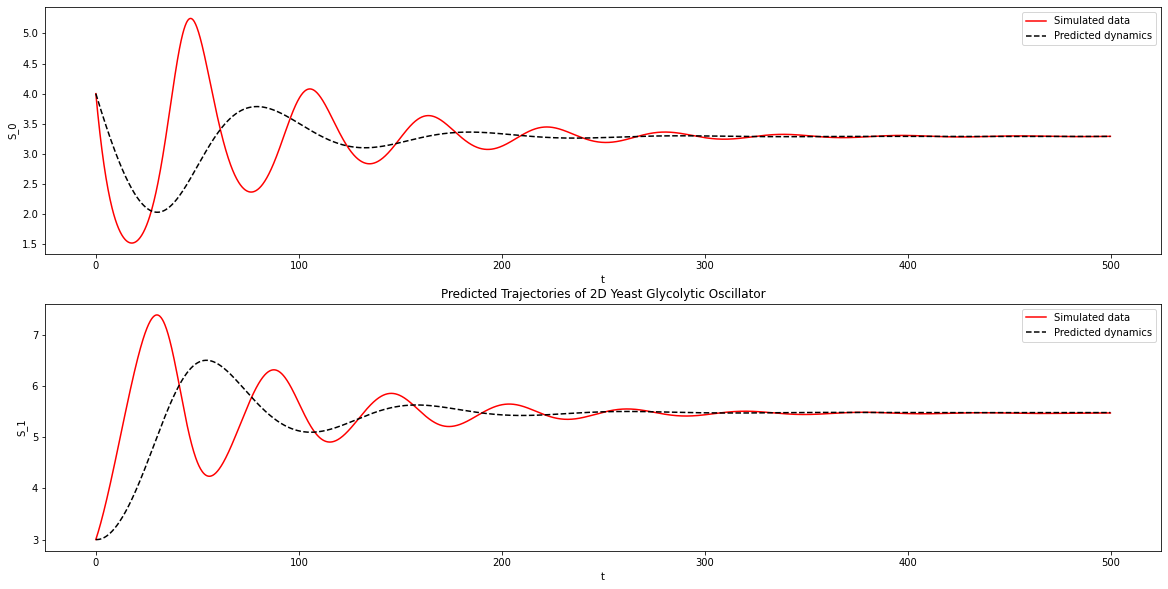

In [5]:
# test for 100 epochs

net = lmmNet(h, data, M, scheme, hidden_layer_units)
N_Iter = 100
net.train(N_Iter)
pred = odeint(predict_fn, x0, time_points, args=(net,))

plt.figure(figsize=(20, 10))

for species in range(2):
    plt.subplot(2,1,species + 1)
    plt.plot(time_points, data[0, :, species], 'r-', label='Simulated data')
    plt.plot(time_points, pred[:,species], 'k--', label='Predicted dynamics')
    plt.xlabel('t')
    plt.ylabel('S_' + str(species))
    plt.legend()
    
plt.title('Predicted Trajectories of 2D Yeast Glycolytic Oscillator')


Text(0.5, 1.0, 'Predicted Trajectories of 2D Yeast Glycolytic Oscillator')

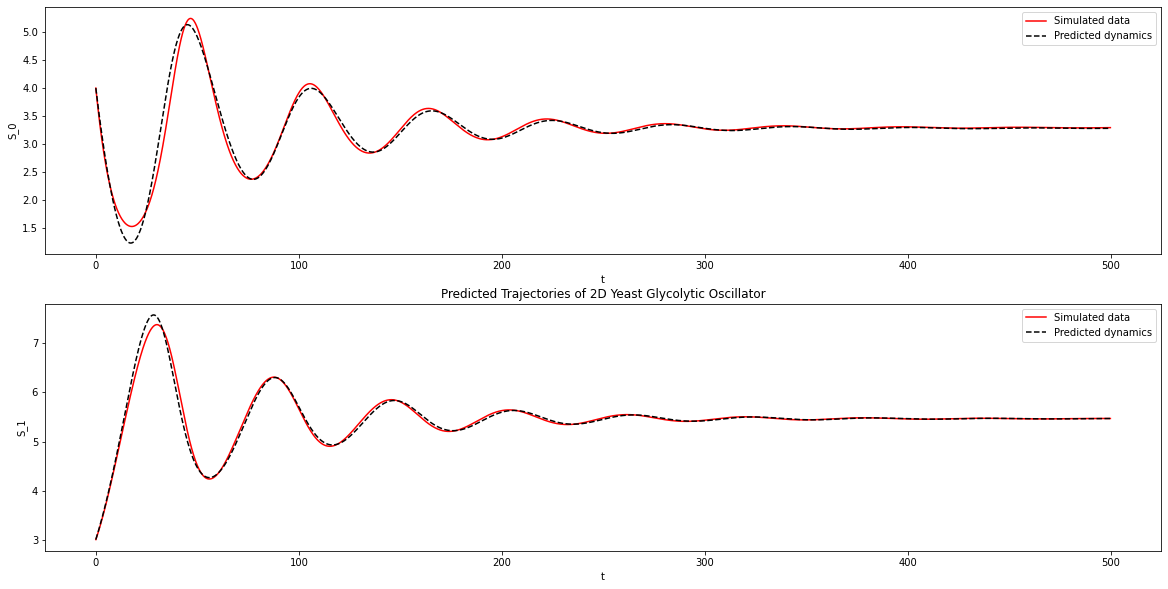

In [7]:
# test for 1000 epochs

net = lmmNet(h, data, M, scheme, hidden_layer_units)
N_Iter = 1000
net.train(N_Iter)
pred = odeint(predict_fn, x0, time_points, args=(net,))

plt.figure(figsize=(20, 10))

for species in range(2):
    plt.subplot(2,1,species + 1)
    plt.plot(time_points, data[0, :, species], 'r-', label='Simulated data')
    plt.plot(time_points, pred[:,species], 'k--', label='Predicted dynamics')
    plt.xlabel('t')
    plt.ylabel('S_' + str(species))
    plt.legend()
    
plt.title('Predicted Trajectories of 2D Yeast Glycolytic Oscillator')


Text(0.5, 1.0, 'Predicted Trajectories of 2D Yeast Glycolytic Oscillator')

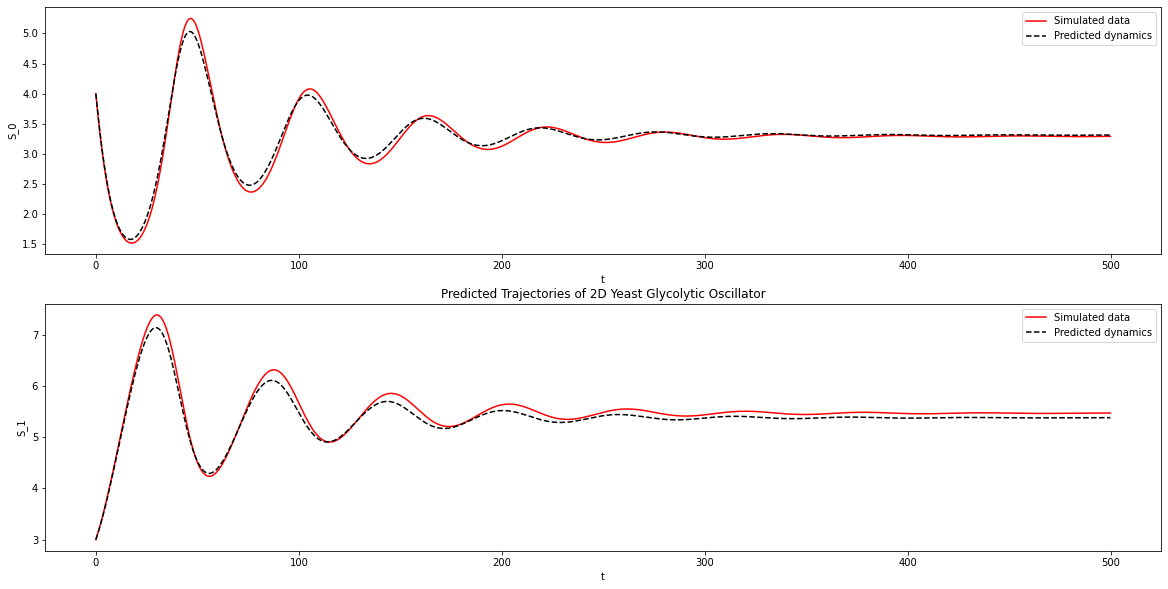

In [8]:
# test for 10000 epochs

net = lmmNet(h, data, M, scheme, hidden_layer_units)
N_Iter = 10000
net.train(N_Iter)
pred = odeint(predict_fn, x0, time_points, args=(net,))

plt.figure(figsize=(20, 10))

for species in range(2):
    plt.subplot(2,1,species + 1)
    plt.plot(time_points, data[0, :, species], 'r-', label='Simulated data')
    plt.plot(time_points, pred[:,species], 'k--', label='Predicted dynamics')
    plt.xlabel('t')
    plt.ylabel('S_' + str(species))
    plt.legend()
    
plt.title('Predicted Trajectories of 2D Yeast Glycolytic Oscillator')


## 2. Plot performance

Note that here we use normalized MSE.

In [79]:
# 2-D Harmonic
avg_mse_onestep = []
for mse_tuple in mse_onestep_list:
    avg_mse_onestep.append(np.mean(mse_tuple))
print("Total average for harmonic oscillator: ", np.mean(avg_mse_onestep))
avg_mse_onestep

Total average for harmonic oscillator:  0.277444272835926


[0.21453691167065153,
 0.2058993298316394,
 0.6805369235218506,
 0.16925595470912602,
 0.23811334029146836,
 0.10852696657834518,
 0.10450596703680717,
 0.07615026022333446,
 0.7426383333241746,
 0.2342787411718626]

In [32]:
# 2-D Harmonic
avg_mse_lmmnet = []
for mse_tuple in mse_lmmnet_list:
    avg_mse_lmmnet.append( np.mean(mse_tuple))
print("Total average: ", np.mean(avg_mse_lmmnet))
avg_mse_lmmnet

Total average:  0.09058012319572831


[0.03113665221561353,
 0.06083492850992751,
 0.09859113281666126,
 0.06717392840226048,
 0.11358646567144451,
 0.10079804349803695,
 0.09884203884941123,
 0.06969103907743827,
 0.11050737540523334,
 0.15463962751125593]

In [67]:
# 3-D Linear
avg_mse_onestep = []
for mse_tuple in mse_onestep_list:
    avg_mse_onestep.append(np.mean(mse_tuple))
print("Total average: ", np.mean(avg_mse_onestep))
avg_mse_onestep

Total average:  0.1777075215185603


[0.13640009986426432,
 0.13093067741340855,
 0.17605501795265677,
 0.16792623858247335,
 0.17596445216763487,
 0.1230174243271155,
 0.2417527072984077,
 0.19128956935085947,
 0.2548102857363122,
 0.17892874249247037]

In [43]:
# 3-D Linear
avg_mse_lmmnet = []
for mse_tuple in mse_lmmnet_list:
    avg_mse_lmmnet.append( np.mean(mse_tuple))
print("Total average for 3D Oscillator: ", np.mean(avg_mse_lmmnet))
avg_mse_lmmnet

Total average for 3D Oscillator:  0.06946164759047663


[0.051517653199807605,
 0.08696028644373437,
 0.08995361067032114,
 0.056187609986527526,
 0.09795619912339225,
 0.05479535300628452,
 0.03667910177162205,
 0.07751775310831675,
 0.032324612452840164,
 0.11072429614191988]

In [82]:
# Wasserstein Distance for 2-D Harmonic
avg_was_onestep = []
for mse_tuple in was_onestep_list:
    avg_was_onestep.append(np.mean(mse_tuple))
print("Total average for harmonic oscillator: ", np.mean(avg_was_onestep))
avg_was_onestep

Total average for harmonic oscillator:  0.03482467551904999


[0.03217873171638353,
 0.001175583644040351,
 0.04008663052803717,
 0.04794740870125156,
 0.058899735906104256,
 0.05808637088268815,
 0.06176615609870114,
 0.009088373404647276,
 0.011227078473448289,
 0.02779068583519824]

In [89]:
# Wasserstein Distance for 2-D Harmonic
avg_was_lmmnet = []
for mse_tuple in was_lmmnet_list:
    avg_was_lmmnet.append(np.mean(mse_tuple))
print("Total average for harmonic oscillator: ", np.mean(avg_was_lmmnet))
avg_was_lmmnet

Total average for harmonic oscillator:  0.013266700866564715


[0.00640513874452418,
 0.013165095903423425,
 0.022717725954431514,
 0.0163601126786862,
 0.010857359722811523,
 0.008366316357677024,
 0.007680638799629654,
 0.02912590463061618,
 0.008511330601081215,
 0.009477385272766238]